https://github.com/girafe-ai/recsys/tree/25s_msai - лекции (слайды)

[https://disk.yandex.ru/d/jGMOukaF6IPRCg/Semester%202](https://disk.yandex.ru/d/jGMOukaF6IPRCg/Semester%202) - видео

# Program

1. Purpose of recommender systems  
2. Examples of recommender systems  
3. Main datasets (competitions), at least 2  
4. Formal problem statement for recommender system  
   a. Matrix completion  
   b. Ranking  
5. Types of recommendation systems:  
   a. collaborative  
   b. content-based  
   c. hybrid  
6. Generic pipeline for contemporary recommender systems  
   (models cascade and candidates funnel)  
7. Feedback types and their characteristics  
   a. Explicit  
   b. Implicit  
8. Collaborative filtering (CF)  
   a. User2user  
   b. Item2item  
9. Problems of recommender systems and their solutions  
   a. Feedback loop  
   b. Cold start  
10. Matrix factorizations, SVD  
11. ALS  
    a. Why are steps not dependent?  
    b. Explicit and implicit  
12. SLIM  
13. Factorization machines  
14. Neural networks for recommendations  
    a. Two towers approach  
    b. Attention based techniques  
15. Offline metrics in recsys  
    a. Formulas and semantics  
16. Online metrics in recsys  
    a. Taxonomy  
    b. Examples  
17. Loss functions for ranking  
    a. Taxonomy  
    b. RankNet  
    c. LambdaRank and LambdaMart  
    d. YetiRank  
18. ALS with MapReduce  
19. KNN indexing  
    a. Purpose and usage  
    b. HNSW  
20. Quantization  
21. Item2item lists technology

# Theoretical minimum

1. Give 5 examples of recommender systems in real services.  
2. Which types of feedback do you know? What are their most important properties?  
3. Give 3 examples of open source datasets.  
4. Formal problem statement of Matrix completion problem  
5. Formal problem statement of Ranking problem  
6. Write 3 formulas for similarity for Collaborative filtering algorithm  
7. What is the difference in item-based and user-based approach to CF?  
8. Formulate ALS algorithm.  
9. What is the difference between explicit and implicit ALS?  
10. What is the two tower approach in RecSys? Why is it good?  
11. Formula for NDCG.  
12. Formula for RankNet loss.  
13. Name three kNN index algorithms.  

## Metrics and ROC

$$
\text{Precision} = {TP \over TP + FP}\\
\text{Recall/TPR} = {TP \over TP + FN}\\
\text{FPR} = {FP \over FP + TN}
$$

TPR = probability of label "zombie" (+) given that one is zombie.

FPR = probability of label "zombie" (+) given that one is not zombie.

ROC (receiver operating characteristic): TPR vs FPR plot. More curved upwards = better. Going left to right decreases the threshold (from 1 to 0).

ROC AUC = area under the curve. Area under the curve calculates the probability that randomly chosen positive example would be ranked higher than randomly chosen negative example.

Other metrics:

$$
\text{F1} = 2\ {{\text{precision} \cdot \text{recall}} \over {\text{precision} + \text{recall}}}
$$

### Two-tower approach

# Theoretical minimum

### 1. Примеры систем рекомендаций в реальных сервисах:

   * Netflix — рекомендации фильмов и сериалов на основе истории просмотров пользователя.
   * YouTube — рекомендации видео на основе истории просмотров и взаимодействия пользователя.
   * Amazon — рекомендации товаров на основе покупок и интересов пользователя.
   * Spotify — рекомендации музыкальных треков на основе прослушанных песен.
   * Instagram — рекомендации постов и аккаунтов на основе взаимодействий с контентом.

### 2. Типы откликов и их важнейшие свойства:

   * Явный отклик (Explicit Feedback): Прямой отклик пользователя, например, рейтинг товара. Свойства: точный, но требует явного действия со стороны пользователя. Минусы: очень смещен в сторону активных пользователей (около 10% пользователей оставляют явный фидбэк)
   * Неявный отклик (Implicit Feedback): Косвенные данные, например, история просмотров или кликов. Свойства: легко собирается, но может быть менее точным.
   * Положительный отклик (Positive Feedback): Отзывы, подтверждающие предпочтение, например, покупка товара, добавление товара в корзину, лайк/реакт, комментарий.
   * Отрицательный отклик (Negative Feedback): Отзывы, указывающие на неприязнь, например, отсутствие покупки.


### 3. Примеры открытых наборов данных:

   * MovieLens — набор данных о фильмах и оценках пользователей.
   * Amazon Product Review Dataset — данные о продуктах и отзывах покупателей.
   * Yelp Dataset — данные о ресторанах, отзывах и пользователях.


### 4. Формализация задачи о дополнении матрицы (Matrix Completion)

Задача дополнения матрицы заключается в том, чтобы восстановить недостающие значения в матрице $ R $, где строки представляют пользователей, а столбцы — товары. Задача формулируется как:
$
\min_{X, Y} \| R - X Y^T \|_F^2 + \lambda \left( \| X \|_F^2 + \| Y \|_F^2 \right)
$
где $ R $ — матрица откликов, $ X $ и $ Y $ — матрицы признаков для пользователей и товаров соответственно, $ \lambda $ — коэффициент регуляризации, а $ \| \cdot \|_F $ — нормировка Фробениуса.

*Дополнить*: где применяется, какие подводные камни, какие альтернативы

### 5. Формализация задачи ранжирования (Ranking Problem):
Задача ранжирования заключается в том, чтобы упорядочить элементы (например, товары или документы) по релевантности. Формализуется как:
$
\min_{\theta} \sum_{i=1}^{N} \sum_{j=1}^{M} L(y_{ij}, \hat{y}_{ij}(\theta))
$
где $ L $ — функция потерь, $ y_{ij} $ — истинный порядок, $ \hat{y}_{ij}(\theta) $ — предсказанный порядок для пары объектов $ i $ и $ j $, $ \theta $ — параметры модели.

*Дополнить*: скопировать слайд с лекции

### 6. Формулы для схожести в алгоритме Collaborative Filtering:

   * Косинусная схожесть:
   $
    \text{sim}(A, B) = \frac{A \cdot B}{\| A \| \| B \|}
   $
   * Корреляция Пирсона:
   $
    \text{sim}(A, B) = \frac{\sum_{i} (A_i - \bar{A})(B_i - \bar{B})}{\sqrt{\sum_{i} (A_i - \bar{A})^2} \sqrt{\sum_{i} (B_i - \bar{B})^2}}
   $
   * Жаккардова схожесть:
   $
    \text{sim}(A, B) = \frac{|A \cap B|}{|A \cup B|}
   $

*Дополнить*: что делать, если пользователи оценивают разные товары – варианты и их сравнение

### 7. Разница между подходами item-based и user-based в Collaborative Filtering:

- Item-based approach: Схожесть вычисляется между объектами (например, товарами или фильмами), а не между пользователями. Рекомендуются похожие товары.
- User-based approach: Схожесть вычисляется между пользователями, и рекомендации делаются на основе предпочтений пользователей, схожих с текущим.

*Дополнить*: формулы и полные алгоритмы

### 8. Формулировка алгоритма ALS (Alternating Least Squares):

Алгоритм ALS решает задачу матричного дополнения, чередуя шаги оптимизации по пользователям и товарам:
1. Фиксируем матрицу $ Y $ (товары) и находим $ X $ (пользователи):
$
X = (Y^T Y + \lambda I)^{-1} Y^T R
$
2. Фиксируем матрицу $ X $ и находим $ Y $:
$
Y = (X^T X + \lambda I)^{-1} X^T R
$

Здесь $ R $ — матрица откликов, $ \lambda $ — регуляризация, и $ I $ — единичная матрица.

*Дополнить*: полный математический вывод, где применяется, какие подводные камни, какие альтернативы


### 9. Разница между явным и неявным ALS:

- Explicit ALS: Использует явные отклики пользователей (например, оценки).
- Implicit ALS: Использует неявные данные, такие как клики или просмотры.

*Дополнить*: на лекциях было что IALS не имеет отношения к неявному фидбеку – уточнить

### 10. Подход "two-tower" в системах рекомендаций:

Подход "two-tower" использует две нейронные сети для кодирования пользователей и товаров в независимые векторные представления, которые затем используются для предсказания релевантности. Это подходит для задач с большими объемами данных и позволяет масштабировать систему.

*Дополнить*: картинки, варианты, связь с системами ранжирования документов и др. с лекции

### 11. Формула для NDCG (Normalized Discounted Cumulative Gain):
$
NDCG_k = \frac{1}{Z_k} \sum_{i=1}^{k} \frac{2^{rel(i)} - 1}{\log_2(i + 1)}
$
где $ rel(i) $ — релевантность элемента $ i $, $ Z_k $ — нормировочная константа.

*Дополнить*: вывод через DCG (не нормированный)

### 12. Формула для RankNet loss:
$
L = \sum_{i,j} \log(1 + \exp(-y_{ij} (s_i - s_j)))
$
где $ y_{ij} $ — истинный порядок (1 для правильного, 0 для неправильного), а $ s_i, s_j $ — предсказания для объектов $ i $ и $ j $.

*Дополнить*: где применяется, какие подводные камни, какие альтернативы, чем заменили

### 13. Три алгоритма индексов kNN:

   * Алгоритм KD-деревьев.
   * Алгоритм Ball Tree.
   * Алгоритм Locality Sensitive Hashing (LSH).

*Дополнить*: детально про LSH (остальное есть/будет в основных вопросах)

# Program

## 1 Purpose of recommender system

Определение:

Система рекомендаций это вид системы поиска/фильтрации информации, предоставляющей пользователю предложения (suggestions) предметов (items), которые ему наиболее подходят. Особенно полезны там, где число предметов крайне высоко.

Высокоуровневые цели: улучшить пользовательский опыт, достижение бизнес-целей.

Альтернативные системы поиска информации: рекламные, поисковые.

**Q**:В чем разница в постановке задачи для разных систем?

**А**:
* В рексис нужно выдавать релевантные документы под субъективные предпочтения пользователей. Максимизируем фидбэк пользователя.

* В поиске нужно выдавать релевантные документы под объективный запрос. Максимизируем саму релевантность.

* В рекламе нужно выдавать пользователю рекламный контент который желательно подходит под его субъективные интересы. Максимизируем релевантность для заказчика рекламы (отличие от рексис)

## 2 Примеры систем рекомендаций:

   * Netflix: Рекомендации фильмов и сериалов на основе истории просмотров и предпочтений пользователя.
   * YouTube: Рекомендации видео, основанные на просмотренной истории и предпочтениях пользователя.
   * Amazon: Рекомендации товаров на основе покупок, интересов и поиска пользователей.
   * Spotify: Рекомендации музыкальных треков на основе прослушанных песен и предпочтений пользователя.
   * Instagram: Рекомендации аккаунтов и постов на основе активности пользователя (лайки, комментарии и подписки).



## 3 Основные наборы данных (конкурсы), хотя бы 2

   * MovieLens: Один из самых известных наборов данных для систем рекомендаций, содержащий информацию о фильмах и оценках пользователей.
   * Kaggle Competition - Netflix Prize: Конкурс, организованный Netflix, где участникам предоставлялись данные о рейтингах фильмов для улучшения алгоритмов рекомендаций.



## 4 Formal problem statement for recommender system


### Две формулировки задачи рекомендации:

### 1. **Восстановление матрицы взаимодействий**
   a. Ограничено только коллаборативной информацией  
   b. Охватывает датасет целиком (глобальный взгляд)  
   c. Обычно решается как задача регрессии

---

### 2. **Ранжирование объектов (items ranking)**
   a. Признаками могут быть любые данные (не только взаимодействия)  
   b. Каждая группа объектов обрабатывается отдельно (например, отдельно для каждого пользователя)  
   c. Требует отдельной (другой) формулировки задачи

---

## **Восстановление матрицы взаимодействий**

Это подход, при котором система старается **восполнить пропущенные значения в матрице** пользователь–объект, используя существующие данные о взаимодействиях.  
Часто применяется в **коллаборативной фильтрации** и формулируется как задача **регрессии**, где целевая переменная — предполагаемая оценка или вероятность взаимодействия.

**Interaction matrix restoration**

Дано:

* $U = \{u_1, \dots, u_m\}$ – пользователи
* $I = \{i_1, \dots, i_n\}$ – предметы (items)
* $R \in \mathbb{R}^{m \times n}$ матрица взаимодействия, где $r_{ij}$ отвечает за взаимодействие пользователя $i$ с предметом $j$. Большинство ячеек отсутствует.

Задача: восставить $R$,

$$
f(u_i, i_j) \approx r_{ij}
$$

где $f$ это модель, которую мы учим.

Варианты:

- Факторизация матрицы: $R \approx U \cdot V^\top$, где $U \in \mathbb{R}^{m \times d}$ и $V \in \mathbb{R}^{n \times d}$
- Нейронные сети

Проблема обычно формулируется как регрессия, в качестве лосса считаем MSE известных элементов матрицы:

$$
\mathcal{L} = \sum_{(u_i, i_j, r_{ij}) \in \mathcal{D}} \left(f(u_i, i_j) - r_{ij}\right)^2
$$

---

*Дополнительный материал*

Что делать, если у нас сложное взаимодействия пользователя с предметом? Например, "посмотрел", "полайкал", "купил". Или добавляется информация о контексте (время действия, устройство и т.п.).

Вариант 1.

В ячейках матрицы уже стоит не число (например рейтинг) а данные о всех таких взаимодействиях (матрица превращается в тензор).

Обрабатывать можно каждый тип взаимодействия отдельно (каждый своей нейронкой или т.п.) или все в совокупности. Лосс считается по всем отдельным взаимодействиям суммарный.

Пример: DeepFM (2017) - https://arxiv.org/abs/1703.04247

Вариант 2.

Моделировать взаимодействие как граф (пользователи и предметы – узлы, рёбра – взаимодействия), использовать GNN для обработки.

Пример: PinSage (2018, Pinterest) - https://arxiv.org/abs/1806.01973

---

**Items ranking**

Дано $N$ запросов (queries) $Q = {q_1, \dots, q_N}$.

Каждый запрос состоит из $K$ документов $D = {d_1, \dots, d_K}$ и их меток релевантности $L = {l_1, \dots, l_K}$.

Каждый запрос $q_i$ описывается вектором признаков размерности $E$, а документ $d_i$ – размерности $M$.

Тогда цель обучения – это построить такую модель, которая наилучшим
образом будет восстанавливать порядок документов в соответствии с
истинными метками релевантности $L$.

$f(q, d) = score_{q,d}$


## 5 Types of recommendation systems


Types: collaborative, content-based, hybrid.

**Colabirative** – коллаборативная фильтрация, то есть u2u и i2i системы. Используют разреженную матрицу юзеров и айтемов.

Плюсы: не нужны метаданные юзеров или айтемов

Минусы: проблема холодного старта, плохо работает при большой разреженности

**Content-based** – использует историю юзера и признаки айтемов: жанры музыки и фильмов. Работает через близость эмбеддингов, рассчитываемые через косинусное расстояние,дот-продукт и прочее.

Плюсы: можно рекомендовать новые айтемы, хорошая персонализация, не нужно искать "соседей"

Минусы: требует метаданных, сильно опирается на прошлый опыт, сложно дать diverse или serendipitous рекомендации

**Hybrid** – использует и то, и другое.
Большинство современных рекомендационных систем - гибридные

## 6 Общий конвейер для современных систем рекомендаций (Pipeline)

Современные системы рекомендаций обычно включают несколько ключевых этапов, которые обеспечивают точность и эффективность в процессе генерации рекомендаций. Эти этапы могут быть представлены через два основных компонента: **candidates funnel (фильтрация кандидатов)** и **models cascade (каскад моделей)**.

#### **Candidates Funnel (Фильтрация кандидатов)**:
На этом этапе система фильтрует объекты, которые могут быть рекомендованы пользователю, основываясь на различных факторах и фильтрах. Обычно используются такие методы, как:
- **Коллаборативная фильтрация (Collaborative Filtering)**: Поиск объектов, которые были популярны среди пользователей с похожими предпочтениями.
- **Контентная фильтрация (Content-Based Filtering)**: Отбор объектов, которые имеют схожие характеристики с теми, что уже были интересны пользователю.
- **Популярность или частота использования**: Выбор наиболее популярных объектов среди всех пользователей.

Этап **candidates funnel** помогает сузить количество объектов, из которых система будет выбирать те, что, вероятно, будут наиболее релевантны пользователю. Это может включать большое количество объектов, и задача состоит в том, чтобы выбрать самые подходящие для дальнейшей обработки.

#### **Models Cascade (Каскад моделей)**:
После того, как кандидаты отобраны на первом этапе, для их оценки используется более сложная обработка, основанная на моделях машинного обучения. Эти модели могут включать:
- **Модели ранжирования**: Используют такие алгоритмы, как RankNet, LambdaMART, которые оценивают, какие объекты из выбранных кандидатов наиболее релевантны.
- **Гибридные модели**: Комбинируют несколько методов, например, контентную и коллаборативную фильтрацию, с использованием нейронных сетей или других техник.
- **Методы обучения с подкреплением**: Модели могут быть адаптированы на основе откликов пользователей и на основе их взаимодействий с системой.

Каждый из кандидатов, отобранных на первом этапе, проходит через каскад моделей для оценки, которые дают финальные рекомендации.



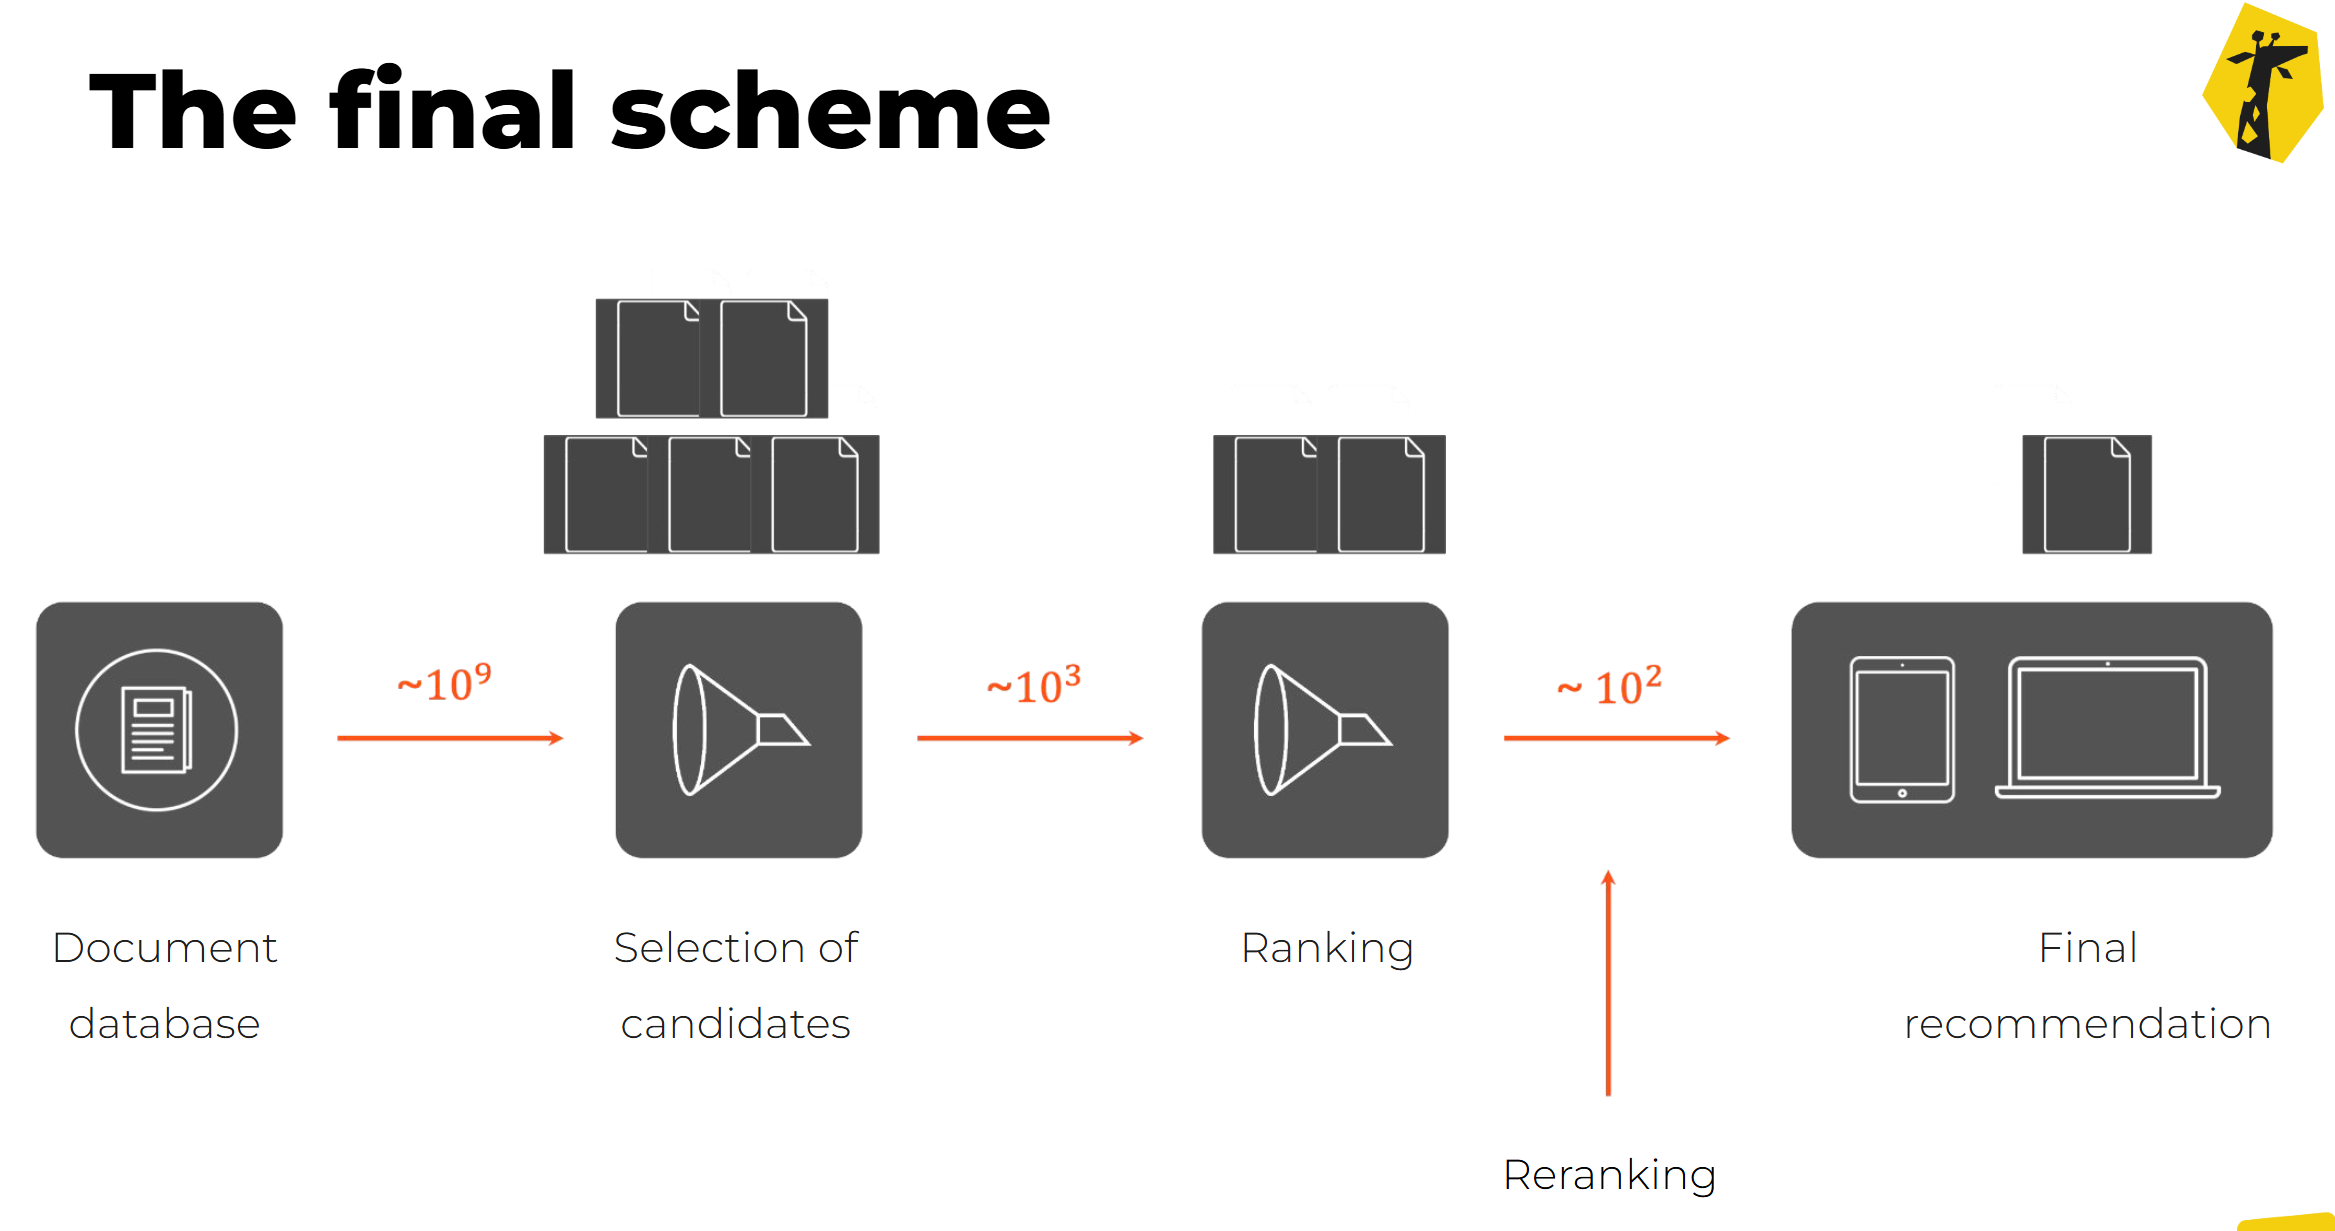

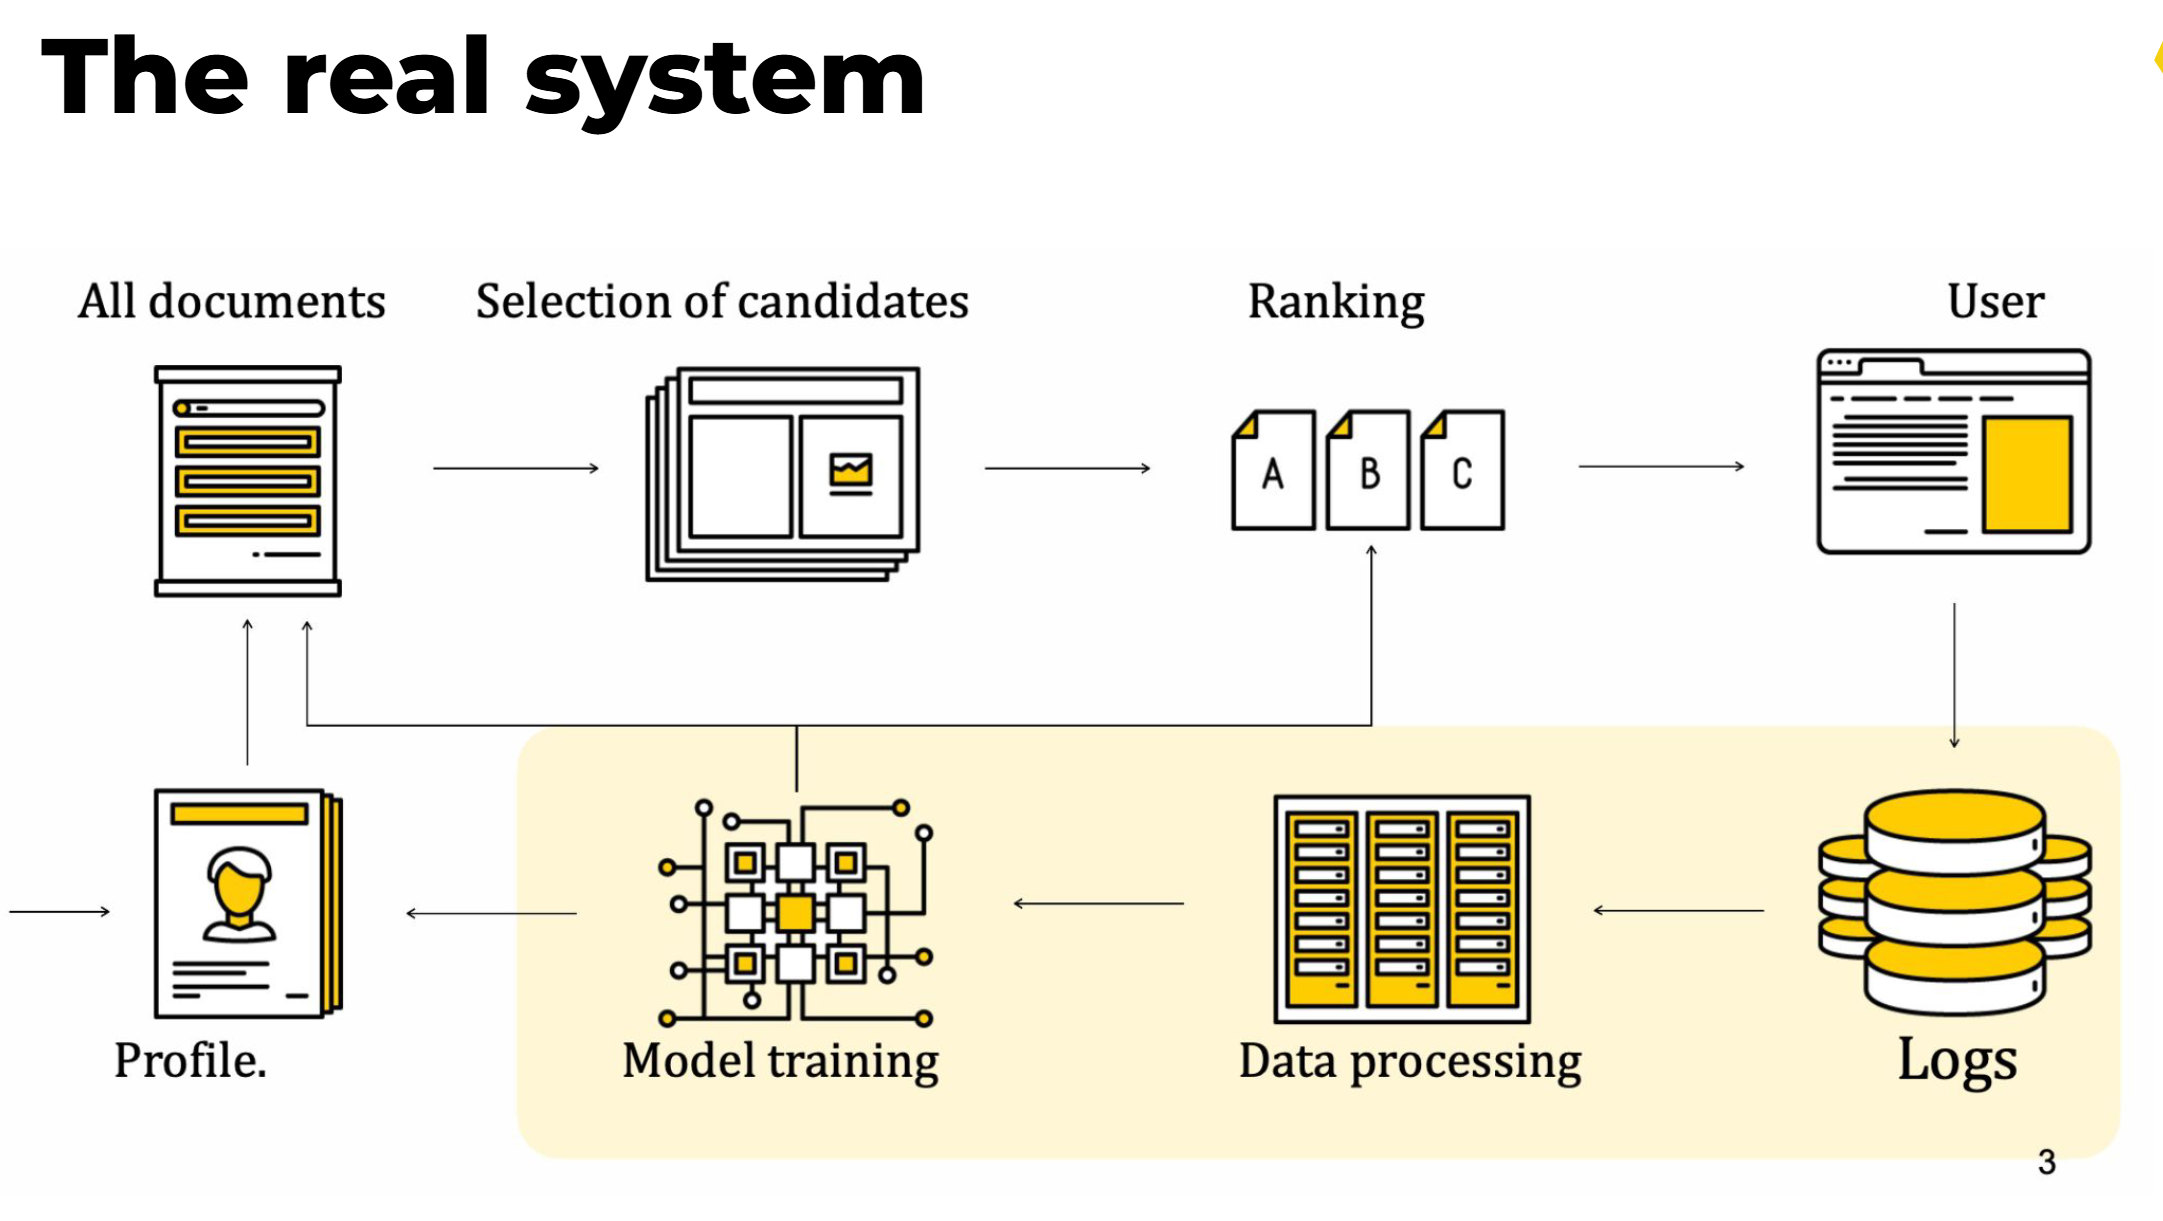

Q: зачем нужен reranking?

A: делается онлайн и на лету, тогда как предыдущая часть воронки может быть частично просчитана оффлайн. Реранкинг также может задействовать несколько разных алгоритмов и легко может быть затюнен под текущую логику бизнеса. Для реранкигна нужна Лосс-функция.

## 7 Feedback types and their characteristics

**Explicit**

Явный фидбек. Является явным выражением отношения пользователя к предмету. Рейтинг фильм, лайк/дислайк трека, обзор продукта.

Особенности:

* Мало данных (~1% от имлицитного)
* Дислайк статьи (например) не значит "не рекомендовать", может тема нравится
* Только 10% пользователей оставляют явный фидбек, соответственно система под них заточена оказывается (bias)

b. Implicit

Любые другие действия пользователя. Время просмотра видео, просмотр статьи, покупка товара.

Особенности:

* Много данных
* Данные неизбежно появляются
* Не факт что напрямую связаны с желанием получать рекомендации. Даже покупка – мог купить предмет в подарок, рекомендации такие не нужны больше.
* Требуют своих подходов для обучения/оптимизации

## 8 Colaborative filtering

\**user2user** : Зададимся некой мерой похожести пользователей $s(u,v)$, тогда для пользователя $u$ соседями будут пользователи $v$, такие что

$$ N(u) = {v \in U ∖ {u} | s(u,v) > \alpha}$$

Считаем рейтинг соседей, на основе него создаем список айтемов, которые соседи лайкнули, но при этом сам юзер не видел. Сортируем айтемы по рейтингу среди соседей и рекомендуем.

$l_u$: лайкнутые айтемы
$ \overline{r_u} $ - средний пользовательский рейтинг
ниже три варианта оценки рейтинга:

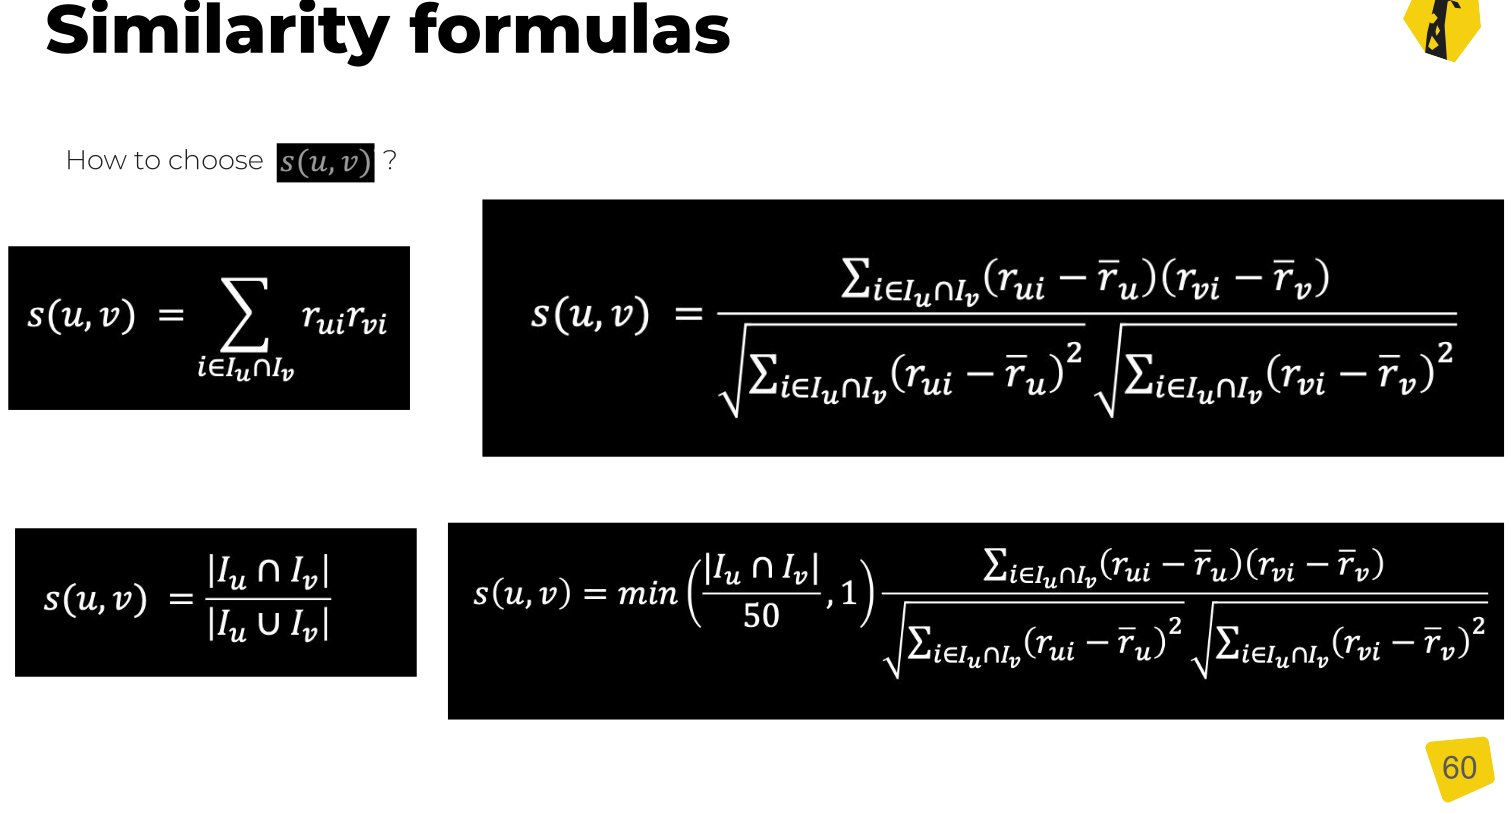

image.png

**item2item** : для данного юзера ищем айтемы наиболее похожие на те, которые он лайкнул

в качестве функции похожести берется косинусное расстояние (хотя на следующем слайде формула для корреляции пирсона, уточнить)

обозначение: множество пользователей $U_i$ оценившее айтем i

формула ниже называется adjusted pearson correlation потому что вычитается рейтинг одного и того же юзера $\overline{r_u}$, а не айтемов

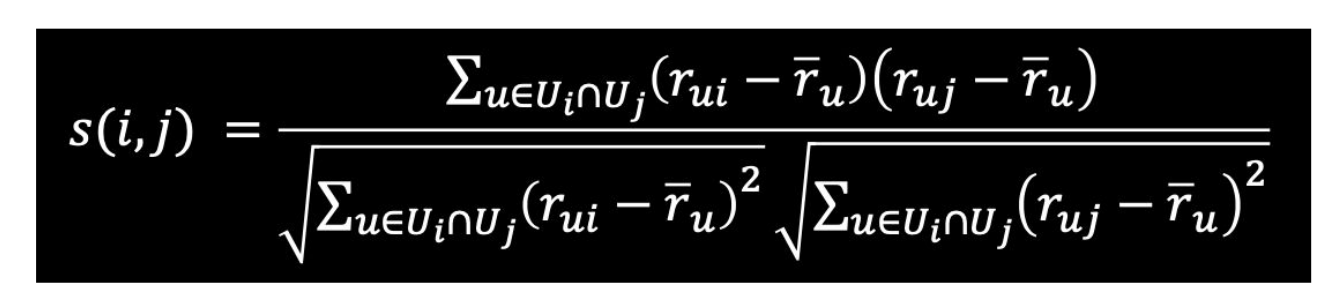

Q: есть N юзеров и M итемов, у пользователя в среднем оценено только k итемов. посчитайте разреженность матрицы.

A: Число оценок (N*k) делим на число ячеек (N*M). Получаем дробь k/M

Q: Как выбрать между u2u и i2i?

A: Пробуем найти такой подход, при котором функции похожести наиболее стабильны. Также учитываем, что i2i может быть предварительно просчитан в оффлайне. Но в то же время например в новостных сервисах айтемы быстро устаревают, и с ними неудобно работать в i2i.

## 9 Проблемы систем рекомендаций и их решения


### a) Feedback loop (цикл обратной связи)

Проблема обратной связи возникает, когда система рекомендаций обновляется на основе того, какие рекомендации были предложены пользователям, что в свою очередь влияет на будущие рекомендации. Это может привести к следующим эффектам:
- **Усиление предпочтений (Filter bubble)**: Пользователи начинают получать рекомендации, которые слишком сильно соответствуют их предыдущим предпочтениям, не получая разнообразных или новых объектов.
- **Недооценка новых объектов**: Новые товары или фильмы могут не попасть в рекомендации, поскольку система не имеет достаточного числа взаимодействий с ними.

**Решения**:
- **Регуляризация и разнообразие**: Внедрение регуляризаторов в модели рекомендаций для обеспечения разнообразия и предотвращения замкнутых циклов.
- **Адаптивные модели**: Использование моделей, которые могут адаптироваться и учитывать не только предыдущие отклики, но и потенциал для новых предпочтений.
- **Использование модели с "свежими" данными**: Включение новых элементов в рекомендации через активное включение данных о новинках или случайных рекомендациях.

### b) Cold start (проблема холодного старта)

Приходит новый пользователь или предмет – что делать? Ещё нет данных, чтобы что-то рекомендовать.

Для предмета:

* показать случайным пользователям для фидбека (использовать квоту новых предметов – например, 5% всех показов пользователям)
* показать на основе категории (может быть указана автором)
* content-based рекоммендации (embedding based similarity)

Для пользователя:

* использовать внешнюю информацию (возраст, пол, доход)
* onboarding – попросить указать предпочитаемые категории
* показать топ популярных (минус: нет дивёрсити)
* показать топ популярных по категории и внешней информации

Набор таких рекомендаций называется cold feed.

YouTube: просто говорит "начните что-нибудь искать".

По мнению Влада, лучший бейзлайн для cold start когда у пользователя нет никаих данных, это подборка топовых айтемов **в различных категориях**  

## 10 Matrix factorizations, SVD

### SVD и разложение в базис собственных чисел

#### Сингулярное разложение (SVD)

$$
A = U \Sigma V^T
$$

* $U$ – ортогональная
* $\Sigma$ – диагональная, сингулярные числа на диагонали, упорядоченные сверху вниз по возрастанию, $\text{rank}\ A$ таких чисел, дальше забито нулями
* $V$ – ортогональная

Или иначе:

* Поворот
* Растяжение (сжатие)
* Поворот

Сингулярные числа:

$$
\sigma_i = \sqrt{\lambda_i(A^T A)}
$$

Столбцы $V$, $v_i$, это собственные векторы $A^T A$, соответствующие $\sigma_i$.

Столбцы $U$ это $u_i = {1 \over \sigma_i} A v_i$

```python
# numpy
U, S, Vt = np.linalg.svd(A)
```

#### Compact SVD

Без потерь можно выкинуть нулевые сингулярные числа и соответствующие элементы $U$, $V$. Пусть $r = \text{rank}A$, тогда:

$$
A = U_r \Sigma_r V_r^T
$$

Прим.: $\Sigma$ делаем квадратной $r \times r$, у $U$ обрезаем столбцы чтоб осталось $r$, у $V^T$ обрезаем строки чтобы осталось $r$ (т.е. у $V$ обрезаем также столбцы).

#### Truncated SVD

Можно выкинуть сингулярные числа из $\Sigma$ для получения приближенного значения $A$:

$$
A \approx A_{approx} = U_k \Sigma_k V^T_k\\
\text{rank}\ A_{approx} = k
$$

Не существует другой матрицы $B_k$ ранга $k$ такой что

$$
\|A - B_k\|_F < \|A - A_{approx}\|,
$$

т.е. усечение SVD это лучшее приближение заданного ранга (теорема Эккарта-Янга). *Примечание*. Здесь минимальная норма Фробениуса, а это тоже самое, что минимизация MSE.

### Разложение в собственные числа

Если $A: n \times n$ имеет $n$ линейно независимых собственных векторов, то она представима как $A = P D P^-1$.

$D$ будет содержать собственные числа $A$ по диагонали. $P$ состоит из колонок, являющихся собственными векторами $A$.

Симметричные матрицы всегда имеют разложение $A = Q \Lambda Q^T$. $Q^T = Q^{-1}$ – ортогональная матрица собственных векторов.

### Общая формулировка факторизации

$$
X_{l, d} \approx U_{l, k} \cdot V^T_{k, d}\\
\|X - UV^T\| \to \min
$$

Где $U$ – матрица фичей меньшей размерности, $V$ матрица перехода (которую можно выкинуть потом).

### Truncated SVD as optimization

Рассмотрим:

* $R \in \mathbb{R}^{m \times n}$ – матрица, которую хотим факторизовать
* $R = U \Sigma V^T$ – сингулярное разложение $R$ (усечённое, $U_k$ и т.д. не пишем чтоб не загромождать нотацию). Тогда $U^T U = I_k$, $V_T V = I_k$ (т.к. эти матрицы ортогональны).
* Альтернативно, мы можем разложить $R$ как $R = U \Sigma V^T = U \Sigma^{1/2} \Sigma^{1/2} V^T =  X Y^T$

Таким образом, из последнего пункта выше, переходим от оптимизационной задачи:

$$
\min_{U, V, \Sigma} \sum_{i,j} (r_ij - u_i^T \Sigma v_j)^2\\
\begin{aligned}
s.t. \quad &U^T U = I_k,\ V^T V = I_k\\
&\forall i\ne j, \sigma_{ij}=0\\
&\forall i < j, \sigma_{ii} > \sigma_{jj}
\end{aligned}
$$

К задаче без ограничений:

$$
\min_{X, Y} \sum_{i,j} (r_{ij} - x_i^T y_i)^2
$$

Добавим регуляризацию:

$$
\min_{X, Y} \sum_{i,j} (r_{ij} - x_i^T y_i)^2 + \lambda \sum_i \| x_i \|^2 C_i + \lambda \sum_j \| y_j \|^2 C_j
$$

Т.е. будем наказывать модель за большие "латентные векторы" соответствующие юзерам ($x_i$) и предметам ($y_i$). Латентные векторы – т.е. строки $X$ (юзеры) и $Y$ (предметы) – фактически играют роль выучиваемых эмбедингов.

Коэффициенты $C_i$ отвечают за "уверенность" или "важность" (каждого пользователя/предмета) считаем как:

$$
C_i = {|\{{j|r_{ij} > 0}\}|^{\alpha}/|U| \over \sum_i | \{ j | r_{ij} > 0 \} |^\alpha}\\
C_i = {\text{(сколько предметов пользователь i протыкал)}^\alpha / \text{(число пользователей)} \over \text{Сумма по всем пользователлям: (тыки пользователя i')}^\alpha}\\
$$

$$
C_j = {|\{{i|r_{ij} > 0}\}|^{\alpha}/|I| \over \sum_j | \{ j | r_{ij} > 0 \} |^\alpha}\\
C_j = {\text{(сколько пользователей протыкали предмет j)}^\alpha / \text{(число предметов)} \over \text{Сумма по всем предметам: (тыки по предмету j')}^\alpha}
$$

При имплицитном фидбеке у нас обычно нет негативных оценок (посмотрел, купил и т.д. – всё хорошо), но при этом разный фидбек имеет разную важность. Пользователей которые на всё тыкают надо наказывать (меньше учитывать их фидбек), чтобы они не управляли моделью целиком.

$\alpha$ выбирается из $[0, 1]$. $0$ – никакой регуляризации, $1$ – линейное взвешивание по количеству взаимодействий.

### LU-decomposition (TBD)

### FR-decomopsition (TBD)

## 11 ALS & iALS

### ALS

Один из похдохов - факторизация матрицы рейтинга юзер-айтем с помощью SVD.

$ R \in \mathcal{R}^{m \times n}$: исходная матрица

$ X \in \mathcal{R}^{m \times k}$: матрица параметров юзеров

$ Y \in \mathcal{R}^{n \times k}$: матрица параметров айтемов

задача приближения:

$$
\min_{X, Y} \| r_{i,j} - x_i y_j^T \|_F^2 +  \lambda C_i \| x_i \|_F^2 + \lambda C_j\| y_j \|_F^2
$$

где $C_i, C_j$ *ЧТО*? а $\lambda$ - регуляризационный коэффициент

важно: элементы суммы (i,j) те, которые присутствуют в разреженной матрице

a. почему шаги независимы?

Основная идея - алгоритм последовательно приближается к минимуму, на каждом шаге элементы матрицы X или Y считаются постоянными.

Например, на текущем шаге все $y_i$ постоянны, тогда Loss на этом шаге будет выглядеть так:

$$
\min_{X, Y} \| r_{i,j} - x_i y_j^T \|_F^2 +  \lambda C_i \| x_i \|_F^2
$$

раскрывая квадраты, получим:

$$ min_{x_i} -2 x_i^T \sum_{(i,j) \in R} r_{ij} y_j + x_i^T \left( \sum_{(i,j) \in R}  y_j y_j^T + C_i \lambda  \right)$$

отсюда получаем выражение для $x_i$:

$$
x_i = \left( \sum_{j \in \mathcal{I}_i} y_j y_j^\top + \lambda I \right)^{-1} \left( \sum_{j \in \mathcal{I}_i} r_{ij} y_j \right)
$$

аланогично на другом шаге, где X константы, получаем для $y_i$:

$$
y_j = \left( \sum_{i \in \mathcal{U}_j} x_i x_i^\top + \lambda I \right)^{-1} \left( \sum_{i \in \mathcal{U}_j} r_{ij} x_i \right)
$$

$U_j$ - множество юзеров, оценивших айтем j,
$I_i$ - множество айтемов, оцененное юзером i


### iALS

по версии Влада, iALS не имеет отношение к неявным данным, просто иначе использует ту же самую матрицу рейтингов

Главное отличие:
* $p_{ij} = 1$ если юзер $i$ взаимодействовал с айтемом $j$, в других случаях 0
* $c_{ij} = 1 + \alpha \cdot r_{ij}$: коэффициент уверенности, где $\alpha$ - гиперпараметр, имеющий значение порядка $10^5$ (уточнить)

Таким образом, оптимизация идет по заполненной матрице

$$
\min_{X, Y} \sum_{i,j} c_{ij} \cdot (p_{ij} - x_i^\top y_j)^2 + \lambda (\|x_i\|^2 + \|y_j\|^2)
$$

Плюсы iALS:

* формально учтены все пользователи и все айтемы
* алгоритм более стабилен и не галюцинирует (со слов Влада)


## 12 SLIM (Sparse Linear Methods)

SLIM — это метод, используемый для рекомендательных систем, который основывается на решении задачи матричного дополнения с использованием разреженных линейных моделей. Он представляет собой подход, где система рекомендаций строится путем минимизации ошибки восстановления матрицы откликов при помощи линейных связей между товарами.

#### Формализация задачи SLIM:
Основная цель SLIM заключается в нахождении разреженной матрицы коэффициентов $W$, которая описывает связь между товарами (или пользователями). Формулировка задачи:
$
\min_{W} \| R - X W \|_F^2 + \lambda \| W \|_1
$
где:
- $ R $ — исходная матрица откликов (матрица пользователей и товаров),
- $ X $ — матрица признаков товаров,
- $ W $ — разреженная матрица весов, показывающая схожесть между товарами,
- $ \| W \|_1 $ — L1-регуляризация для обеспечения разреженности,
- $ \lambda $ — коэффициент регуляризации.

Таким образом, SLIM использует разреженные весовые матрицы для того, чтобы получить рекомендации, минимизируя ошибку, а также избегать переобучения, контролируя разреженность матрицы.

## 13 Factorization machines

### Идея

https://ieeexplore.ieee.org/abstract/document/5694074

Скрещиваем SVM и факторизацию (в каком-то роде).

Особенности:

* Тренируется градиентным спуском
* Факторизация весов парных взаимодействий фич
* Линейное время выполнения

Прим. к картинке ниже: можно также докинуть столбцы, обозначающие вспомогательные фичи. Они не обязаны быть 0 или 1, могут быть числом просто.

image.png

### Наивное взаимодействие фич

Раскладываем матрицу взаимодействий $R$ в проблему регрессии:

$$
f(X) = y
$$

Делаем так:

* Каждая строка новой матрицы $X$ (входных примеров) это one hot вектор на основе ячейки $R$. Конкретно, берём очередную непустую ячейку $R$ и кодируем $x_i$ как вектор $(0, \dots, 1, \dots, 0, \dots 1, \dots 0)$. Т.е. в нём ровно две единицы, первая стоит на месте соответствующего пользователя, а вторая на месте соответствующего предмета (предметы идут после пользователей).
* $y$ это число в соответствующей ячейке (по смыслу это рейтинг пользователя и т.п.)

Линейная регрессия будет давать плохие предсказания (в преобразовании учли что в строке $X_i$ большинство значений $x_{ij}$ нулевые):

$$
f(X_i) = w_0 + \sum_{j=1}^n w_i x_{ij}
$$

Если добавить члены второго порядка, чтобы дать возможность модели выучивать более сложные фичи, получится:

$$
f(X_i) = w_0 + \sum_{j=1}^n w_i x_{ij} + \sum_{j=1}^n \sum_{k=j+1}^n w_{ij} x_{ij} x_{ik}
$$

Посчитаем параметры:

$$
1 + n + n(n+1)/2
$$

Учитывая что $n = |I| + |U|$, это слишком много.

### Машина факторизации

Возьмём и скажем что каждый пользователь и каждый предмет ассоциирован с неким "латентным вектором" (по сути эмбеддингом) $v_i$ размерности $k$. (Эти векторы модель должна выучить.) Тогда задача принимает вид (чтоб не загромождать запись, запишем $x_{ij}$ как $x_j$):

$$
f(X_i) = w_0 + \sum_{j=1}^n w_i x_j + \sum_{j=1}^n \sum_{k=j+1}^n \langle v_j, v_k \rangle x_j x_k
$$

Мы просто берём и предполагаем, что взаимодействия "второго порядка" между $x_j$ и $x_k$ могут быть смоделированы через скалярное произведение (= близость) двух неизвестных векторов $v_j$ (для $x_j$), $v_k$ (для $x_k$). Число латентных векторов равно числу столбцов $X$ (по одному на каждый столбец – каждую фичу).

Вместо $n*n$ коэффициентов для такого вида связи получаем всего $n$ векторов размерности $k$.

Общее количество параметров: $1 + n + nk$ – уже норм.

Последнее слагаемое можно посчитать за $O(nk)$:

$$
\sum_{j=1}^n \sum_{k=j+1}^n \langle v_j, v_k \rangle x_j x_k = {1 \over 2} \left\| \sum_{j=1}^n v_j x_j \right\|^2_2 - {1 \over 2} \sum_{k=1}^n \|v_k\|^2_2 x_k^2
$$

Доказательство:

$$
\left\| \sum_{j=1}^n v_j x_j \right\|^2
= \left\langle \sum_{j=1}^n v_j x_j,\ \sum_{k=1}^n v_k x_k \right\rangle
$$

$$
= \sum_{j=1}^n \sum_{k=1}^n \langle v_j, v_k \rangle x_j x_k
$$

$$
= \sum_{j=1}^n \langle v_j, v_j \rangle x_j^2 + \sum_{j=1}^n \sum_{\substack{k=1 \\ k \ne j}}^n \langle v_j, v_k \rangle x_j x_k
$$

$$
= \sum_{j=1}^n \|v_j\|^2 x_j^2 + 2 \sum_{j=1}^n \sum_{k=j+1}^n \langle v_j, v_k \rangle x_j x_k
$$

$$
\Rightarrow \sum_{j=1}^n \sum_{k=j+1}^n \langle v_j, v_k \rangle x_j x_k
= \frac{1}{2} \left( \left\| \sum_{j=1}^n v_j x_j \right\|^2 - \sum_{j=1}^n \|v_j\|^2 x_j^2 \right)
$$

### Field-aware factorization machines (FFM)

Особенности:

* Также как FM линейная по $n$
* Также как FM тренируем градиентым спуском
* Лучше всего, когда есть категориальные признаки с большим числом вариантов

Допустим пользователь #15 поставил оценку машине #23, её марка Toyota, модель Corolla, цвет Red, год выпуска 2018.

Тогда сответствующая строка матрицы $X$ будет примерно такая:

$$
x = \big(
\underbrace{0,\dots, \mathbf{1}, \dots, 0}_{\text{user_15 @ pos 15}},
\underbrace{0,\dots, \mathbf{1}, \dots, 0}_{\text{car_23 @ pos 1023}},
\underbrace{0,\dots, \mathbf{1}, \dots, 0}_{\text{Toyota @ pos 3007}},
\underbrace{0,\dots, \mathbf{1}, \dots, 0}_{\text{Corolla @ pos 3078}},
\underbrace{0,\dots, \mathbf{1}, \dots, 0}_{\text{Red @ pos 3553}},
\underbrace{0,\dots, \mathbf{1}, \dots, 0}_{\text{2018 @ pos 3585}}
\big)
$$

Т.е. состоять из блоков:

* Пользователи (единичка в той позиции, кто поставил оценку)
* Машины (единичка в той позиции, какой поставил оценку)
* Изготовитель (позиция для единички у каждой модели своя)
* Модель (аналогично)
* Цвет (аналогично)
* Год выпуска (аналогично)

Каждый такой блок (т.е. группа соседних столбцов) называется "поле".

Вместо подобной "блочной" кодировки для каких-то фич могут быть просто числа. Например просто $7$ для возраста машины вместо единички в позиции "7 лет". Тогда такой столбец будет полем из одного столбца.

Рейтинг, который юзер поставил (который наша модель предсказывает), это $y$.

На картинки поля выделены цветными прямоугольниками.

Идея FFM: сделаем по отдельному латентному вектору на каждую пару полей. Теперь у нас $n * f$ латентных векторов ($f$ – количество полей, например 5 на картинке выше).

Модель принимает вид:

$$
f(x) = w_0 + \sum_{i=1}^n w_i x_i + \sum_{i=1}^n \sum_{j=i+1}^n \langle v_{i, f_j}, v_{j, f_i} \rangle x_i x_j
$$

Число параметров: $1 + n + nfk$ ($n$ – число столбцов, $f$ – полей, $k$ – размерность латентных векторов).

## 14 Neural Networks for recommendations

DSSM (Deep Structured Semantic Model) - модель разработанная для поиска, но адаптированная для РекСис. Принцип работы - обучается на эмбеддингах запросов и документов (queries and documents) и соединяет в пары по похожести (косинусное расстояние или скалярное произведение).


Q – text query, D – document
$x_Q$ and $x_D$ are their representations, for
example, in the form of bag of words
(~100k)

The request and the document are
translated by neural networks into
embeddings of a small size (~300)

Between them we consider the
proximity function, cosine, scalar
product, etc
We rank documents by the proximity
value

для DSSM тяжело считать градиенты:

$$
\mathcal{L} = -\log \frac{\exp(\gamma \; \text{sim}(u, i^+))}{\sum_{i \in \mathcal{I}} \exp(\gamma \; \text{sim}(u, i))}
$$

* $i^+$: айтемы с которыми провзаимодействовал юзер
* $\mathcal{I}$: **все айтемы** в базе (очень много)
* $\text{sim}(u, i)$: скалярное произведение или косинусное расстояние
* $\gamma$ k-t smoothing, established empirically (???)


Выход: негативное сэмплирование: выбираем небольшую выборку айтемов с которыми юзер не взаимодействовал

$$
\mathcal{L} = -\log \frac{\exp(\text{sim}(u, i^+))}{\exp(\text{sim}(u, i^+)) + \sum_{j=1}^k \exp(\text{sim}(u, i^-_j))}
$$

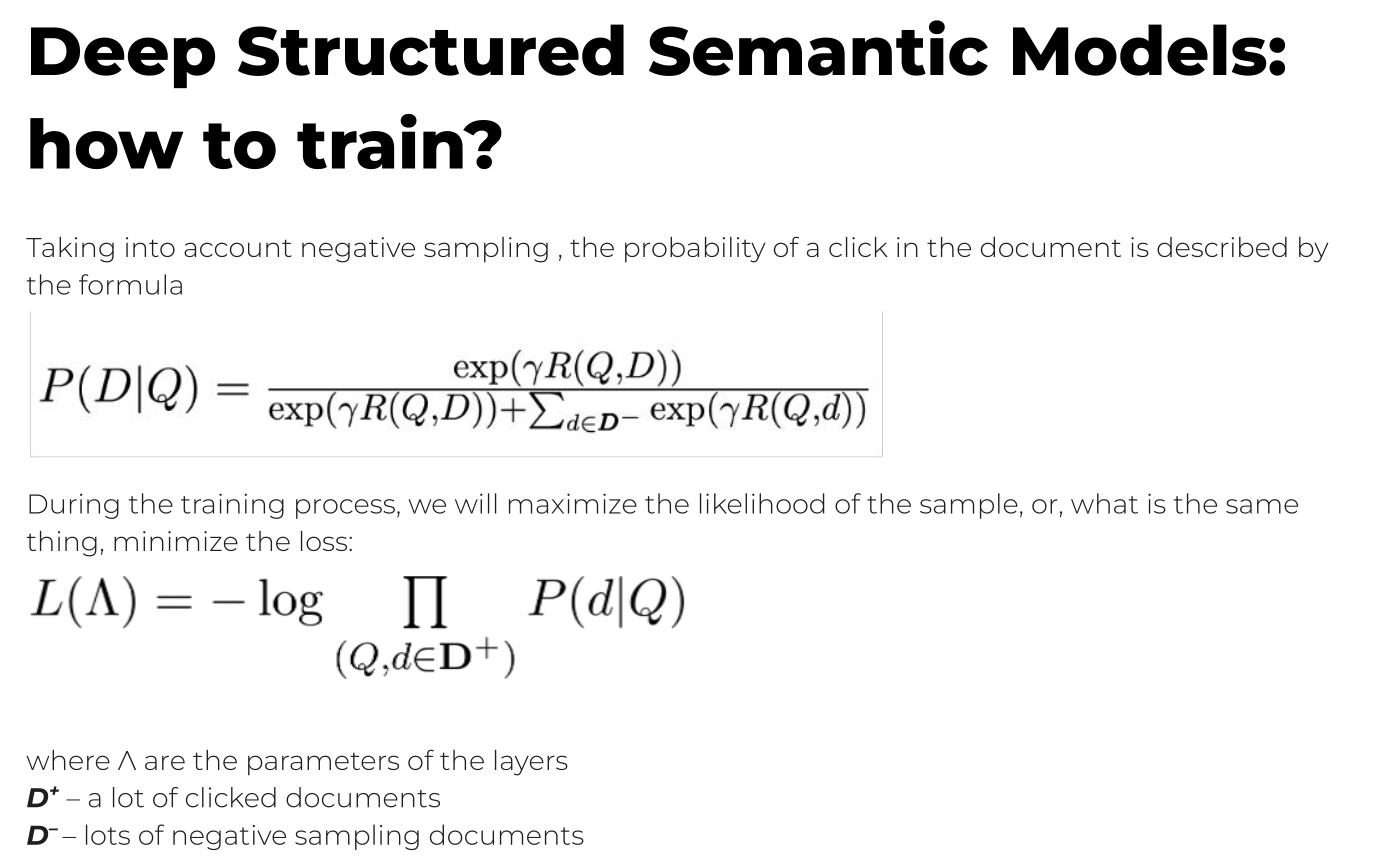

а) two towers approach

Обобщение DSSM - система с двумя перцептронами (MLP - multi layer perceptron) состоящими из нескольких слоев линейных преобразований и акциваций. Каждый из перцептронов кодирует свои эмбеддинги из фичей. Например, один пользовательскую матрицу, другой матрицу айтемов, которые получены из SVD. Два эмбеддинга соединяются в некотором слое и выдают уже ранжированные рекоммендации (или что-нибудь другое, на что они натренированы).

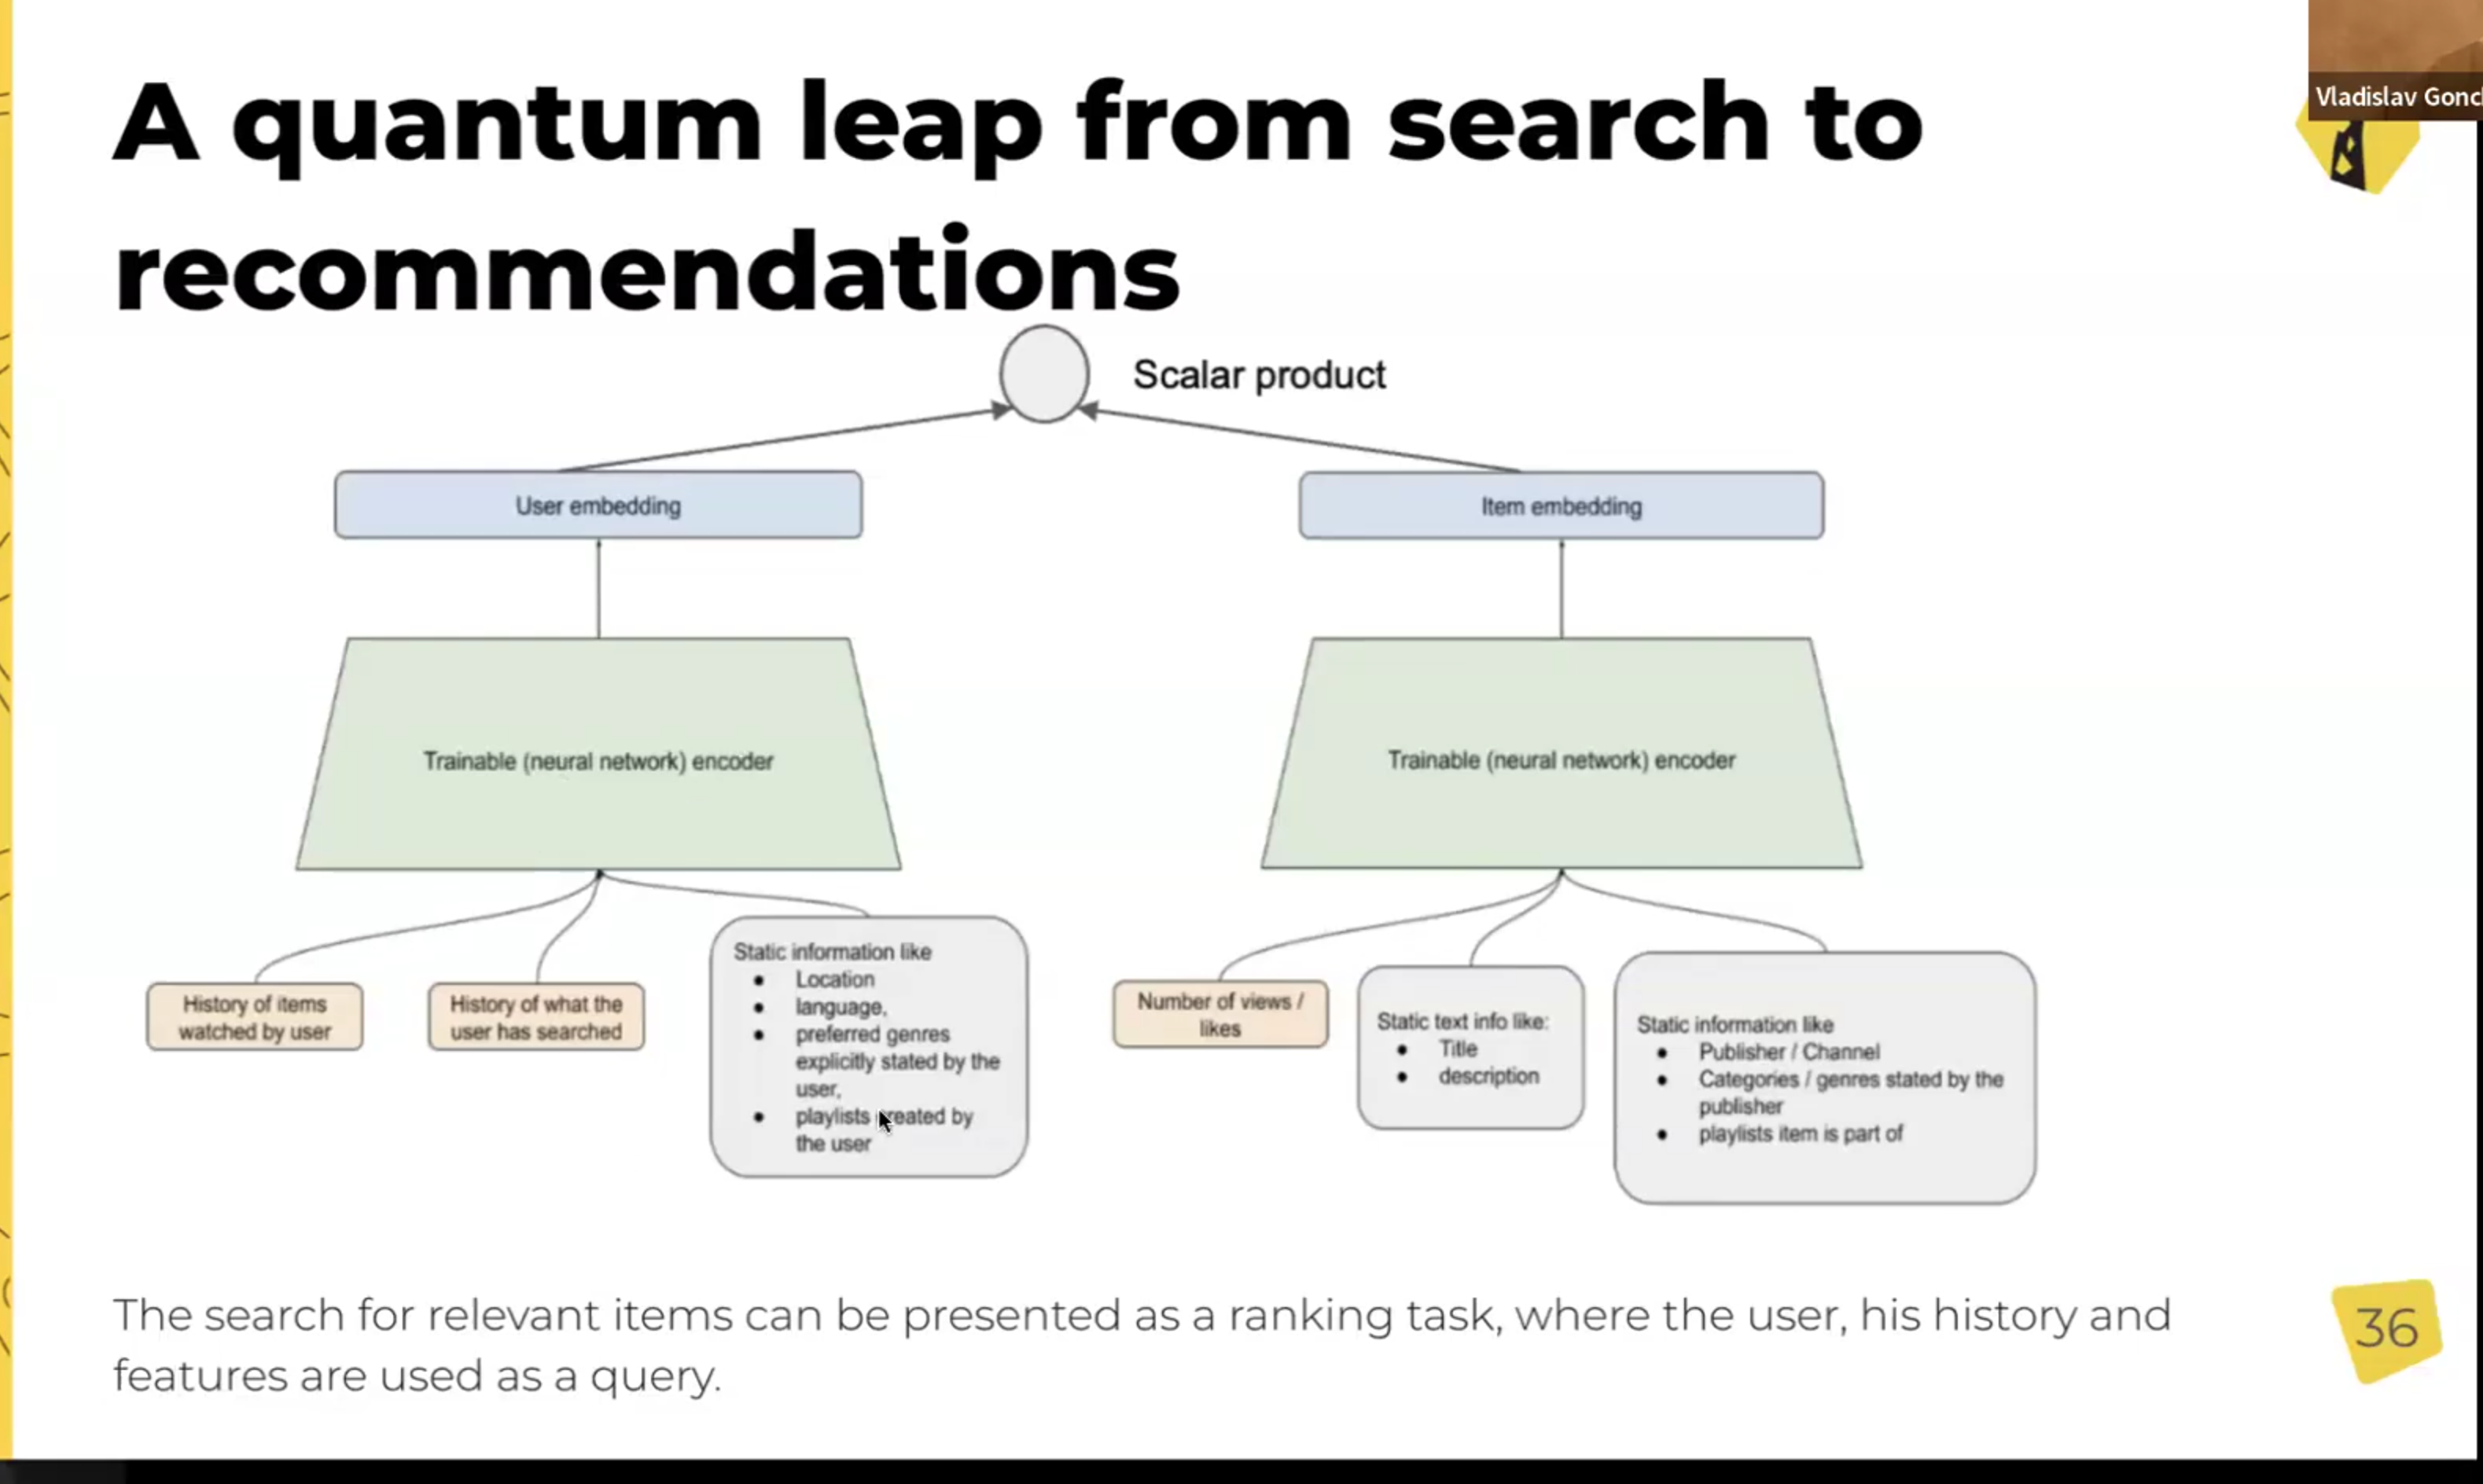

типы Лосс-функций в таких системах:


* MSE
* Cross Entropy Loss (CE)
* Pairwise loss
* Full Product Softmax loss (aka: Infancy, InfoMAX, SINCLAR)


Преимущества таких систем:

* A large space for creativity in the design of features☝
* Fast inference, since embedding and items can be pre-calculated offline
* The ability to build an offline (and even online) selection of candidates for
trained embedding

б) attention techniques

Аттеншн применяется чтобы перевзвесить историю юзера и дать наиболее релевантные рекомендации

$$
e_j = \text{MLP}([x_j, x_t, x_j \cdot x_t]) \quad\text{(where } x_j = \text{предыдущий айтем}, x_t = \text{предполагаемый айтем)}
$$

$$
\alpha_j = \frac{\exp(e_j)}{\sum_k \exp(e_k)}
$$

$$
z = \sum_j \alpha_j x_j \quad\text{(пользовательские эмбеддинги с учетом контекста)}
$$


## 16 Online metrics

Метрики, которые делаются не на исторических данных, а "в проде".

Зависят от продуктов, бизнес-целей, влияют на решения о внедрении модели. Могут не учитывать специфику обученной модели, вместо этого учитывают специфику бизнеса.

### Продуктовые метрики

Стандартные (= плохие) варианты:

1. События
    * Общее число кликов/просмотров
    * Click through rate и пр. конверсии
    * Общее время, проведенное на сервисе
2. Сессия
    * Средняя длина сессии (в количестве кликов, например)
    * Средняя позиция (в ранжированной выдаче) клика по сессиям
    * Доля кликов по топ3/топ5/и т.д.
    * Можно сегментировать все метрики по длинным и коротким сессиям
3. Пользователь
    * Удержание (DAU – daily active users, DAU/MAU – DAU over monthly active users, ARPU – average revenue per user)
    * Среднее число сессий на пользователя
    * Средняя позиция первого клика по пользователям

События очень просто сделать плохой метрикой и измерять ерунду. События и сессии сильно подвергаются воздействию флуда/спама/фрода. Лучше делать свои метрики.

Пример: проводим A/B тест и в качестве метрики используем количество звонков. Чтобы уменьшить влияние ботов (которые могли активно названивать только в B, например, накрутив метрику) бьём в каждом сплите юзеров по случайным подгруппам. Получаем два ряда метрик, сравниваем t-тестом или ещё каким-нибудь статистическим тестом.

Фокусирование на продуктовых метриках может привести к ухудшению продукта. Надо следить за счастьем пользователя.

### Деревья метрик

Одна ключевая метрика, которая декомпозируется на более частные.

Примеры таких метрик по сервисам (спекулятивно):

* Facebook – daily active users
* AirBnB – nights booked
* Spotify – time spent listening
* Amazon – purchase per user & purchase frequency
* Slack – messages sent per user, DAU
* Netflix – hours watched
* Uber – rider per week per rider

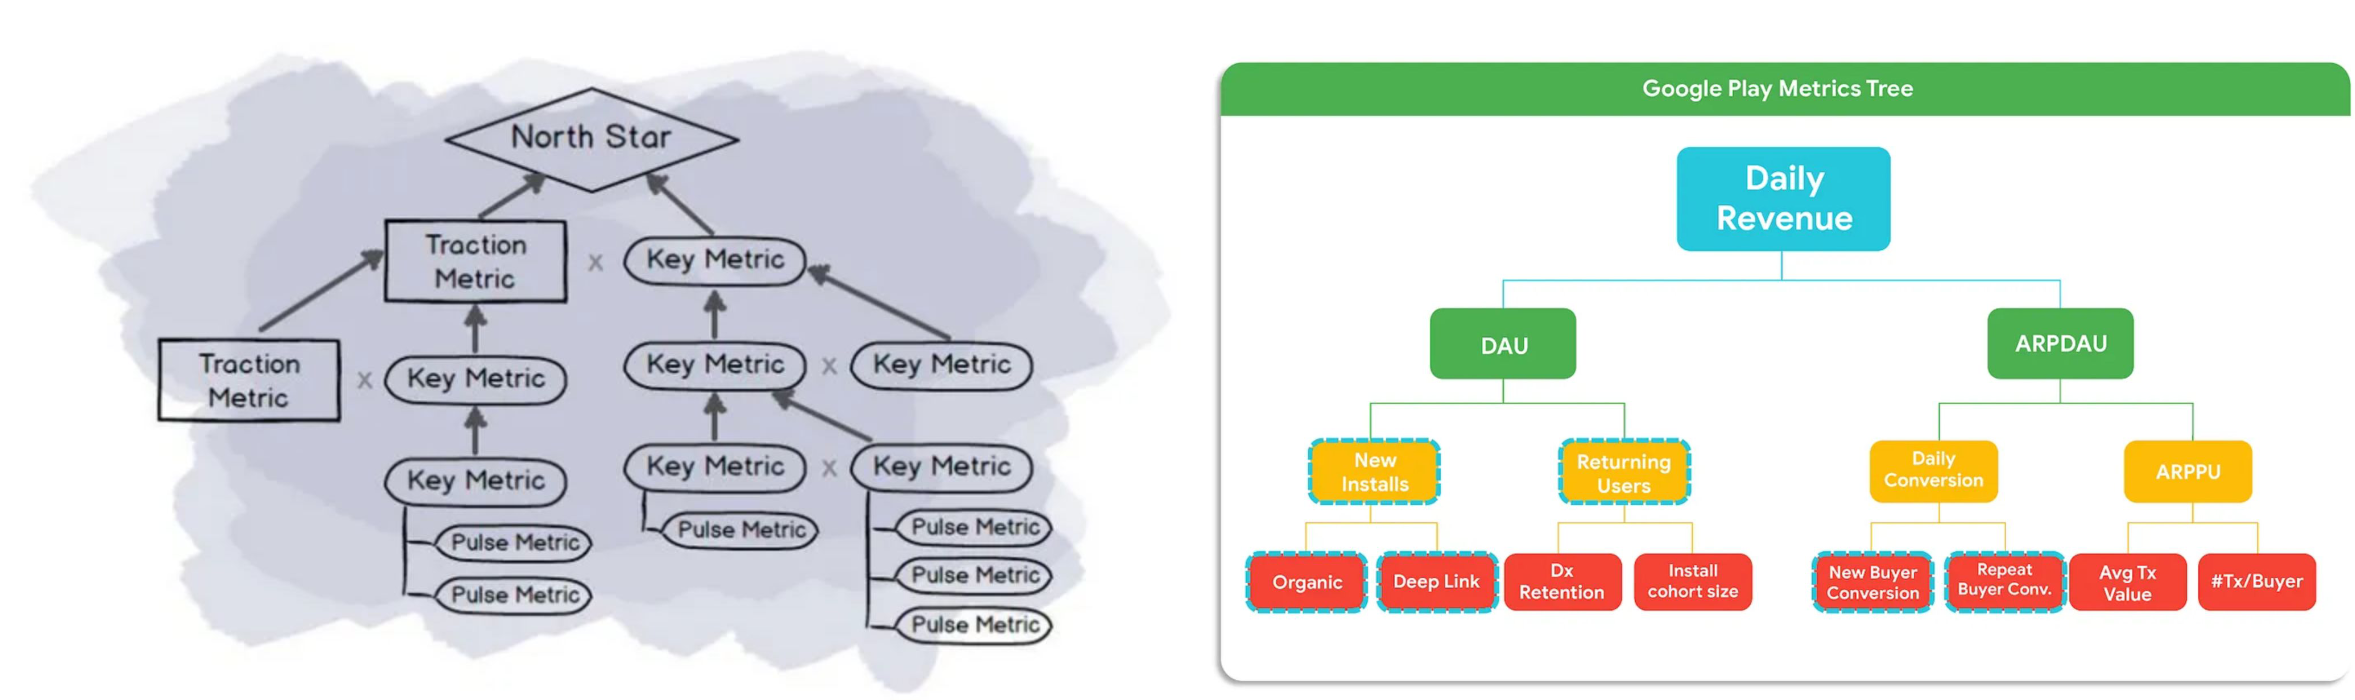

## 17 Loss functions for ranking

а) Какие бывают лоссы в ранкинге?
Точечные (POintwise) аналогично регрессии и классификации. Примеры - MSE, Cross-Entropy.

Парные (pairwise): лучше отражают взаимный порядок между элементами. Примеры RankNet, BPR, Hinge

Списочные (Listwise) оптимизированы для ранжирования списка. Примеры ListNet, LambdaRank, LambdaMART, YetiRank.

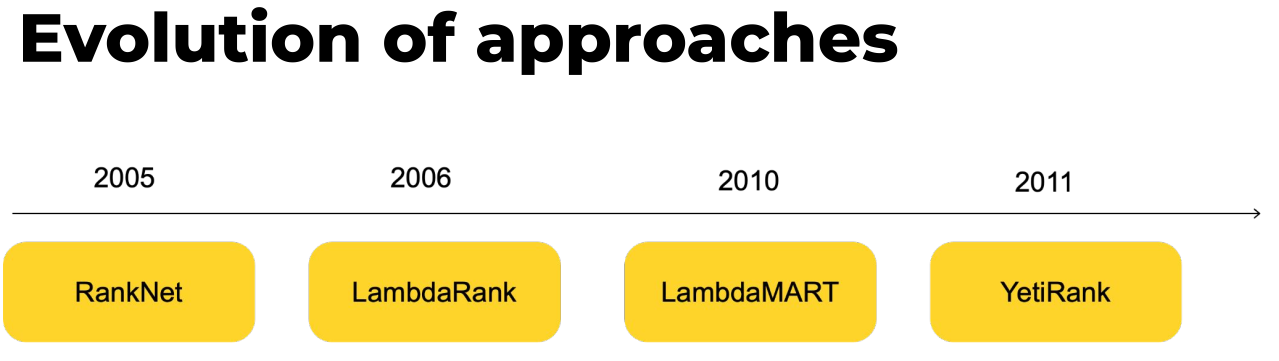

б) RankNet (pairwise)

Задаемся функцией скоринга $s(x)$ , такой, что:

$$
s(x_i) > s(x_j) \quad \text{когда } x_i \text{ в ранге выше чем } x_j
$$

Функция потерь:

$$
\mathcal{L}_{\text{RankNet}} = -y_{ij} \log \sigma(s_i - s_j) - (1 - y_{ij}) \log (1 - \sigma(s_i - s_j))
$$

Где:

* $s_i = s(x_i)$, $s_j = s(x_j)$: скор
* $\sigma(x) = \frac{1}{1 + e^{-x}}$ (сигмоида)
* $y_{ij} = 1$ если $x_i$ должен быть выше $x_j$ в ранге, иначе 0


 Получаем по сути **cross-entropy loss**  для бинарного случая, как в лог регрессии: $x_i$ выше $x_j$ для положительного и ниже для отрицательного класса.



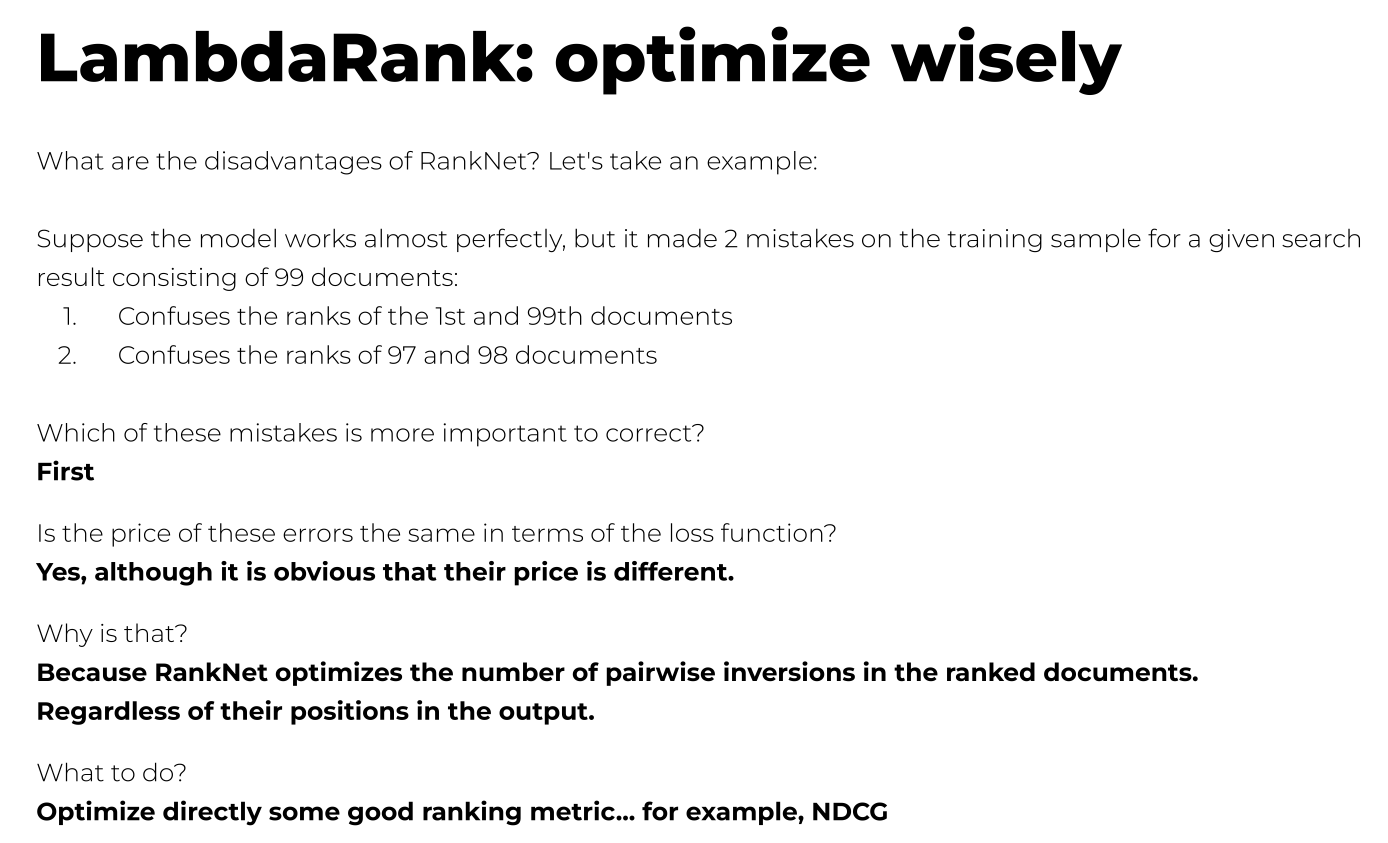

в) LambdaRank (parwise) и LambdaMART (listwise)


LambdaRank:

* Прокачивает RankNet с помощью **"лямбда"** (градиентов) которые изменяют **NDCG** при перестановке элементов в паре.

**Lambda градиент:**

$$
\lambda_{ij} = \frac{dC(s_i - s_j)}{d s_i} = \frac{- \sigma(s_j - s_i)}{1 + e^{\sigma(s_j - s_i)}} |\Delta \text{NDCG}_{ij}|
$$

где:

* $\Delta \text{NDCG}_{ij}$: насколько изменится NDCG если $x_i$ поменять местами с  $x_j$

> LambdaRank не является явной функцией потерь, только определяет градиенты для оптимизации.


LambdaMART (Listwise + градиентный бустинг с деревьями)

* Совмещает LambdaRank и **MART** (Multiple Additive Regression Trees, aka Gradient Boosted Trees)
* Используем **лямбды** для деревянной модели


https://softwaredoug.com/blog/2021/11/28/how-lammbamart-works.html объясняющая статья

г) YetiRank

Listwise + Permutation-Aware


1) Not all document pairs are equally useful. You need to weigh it.
2) The most important pairs are those that meet in the top of the rating
3) The model's confidence is important that the i-th document is relevant to the j-th. Regularization for uncertain prediction.


Defined over **all item pairs** in a list but with **weighting** to account for rank position sensitivity:

$$
\mathcal{L}_{\text{YetiRank}} = \sum_{i,j} w_{ij} \cdot \left( \log(1 + \exp(-(s_i - s_j))) \right)
$$

Where:

* $w_{ij}$ reflects uncertainty in pair $(i, j)$ and their contribution to the ranking metric
* It can depend on **rank distance** or NDCG-like contributions

links for explanation:

https://arxiv.org/pdf/2204.01500

https://www.youtube.com/watch?v=9tNZTPPxKl8

https://catboost.ai/en/docs/concepts/loss-functions-ranking#pairwise-objectives-and-metrics

https://github.com/catboost/catboost/blob/master/catboost/tutorials/ranking/ranking_tutorial.ipynb



## 18 ALS with MapReduce

**ALS (Alternating Least Squares)** — это популярный алгоритм для решения задачи матричного дополнения в системах рекомендаций, который использует чередование оптимизации для матриц признаков пользователей и товаров.

#### Использование ALS с MapReduce:
MapReduce — это парадигма обработки данных, которая используется для масштабируемой обработки больших объемов данных. Использование ALS в рамках MapReduce позволяет распределенно обучать модель и эффективно работать с большими данными, например, в облачных вычислениях.

1. **Алгоритм ALS**:
   В ALS задача матричного дополнения сводится к нахождению двух матриц $ X $ и $ Y $, которые минимизируют ошибку восстановления:
   $
   \min_{X, Y} \| R - X Y^T \|_F^2 + \lambda \left( \| X \|_F^2 + \| Y \|_F^2 \right)
   $
   где $ X $ — матрица признаков пользователей, $ Y $ — матрица признаков товаров, $ R $ — матрица откликов пользователей на товары.

2. **Реализация с MapReduce**:
   Процесс обучения ALS с использованием MapReduce включает в себя несколько этапов:

   - **Map**: На этапе map для каждого пользователя и товара вычисляется ошибка матричного дополнения, а также обновляются значения для матриц $ X $ и $ Y $. Каждая пара $ (пользователь, товар) $ обрабатывается независимо.
   
   - **Reduce**: На этапе reduce агрегируются результаты обработки каждого пользователя и товара для вычисления обновлений для матриц $ X $ и $ Y $.

   Этот подход позволяет параллельно обрабатывать большие объемы данных, что делает обучение системы масштабируемым и быстрым даже при огромных датасетах.

3. **Преимущества использования MapReduce с ALS**:
   - **Масштабируемость**: Возможность обработки огромных объемов данных, которые не помещаются в память одного узла.
   - **Распределенная обработка**: Распараллеливание вычислений между множеством узлов ускоряет обучение модели.
   - **Эффективность**: За счет параллельной обработки данных можно достичь хорошей производительности при больших объемах данных.

Эта технология применяется в крупных системах рекомендаций, таких как Netflix, где необходимо обрабатывать данные миллионов пользователей и товаров.

## 19 kNN indexes

а) Какие бывают лоссы в ранкинге?
Точечные (POintwise) аналогично регрессии и классификации. Примеры - MSE, Cross-Entropy.

Парные (pairwise): лучше отражают взаимный порядок между элементами. Примеры RankNet, BPR, Hinge

Списочные (Listwise) оптимизированы для ранжирования списка. Примеры ListNet, LambdaRank, LambdaMART, YetiRank.

### Идея

Прим.: см. k-d index (бьём по осям, по медиане координат), ball (бьём на шары), vantage point (бьём по расстоянию до случайной/выбранной точки) в ML-конспекте.

В RecSys лекциях ключевой HNSW

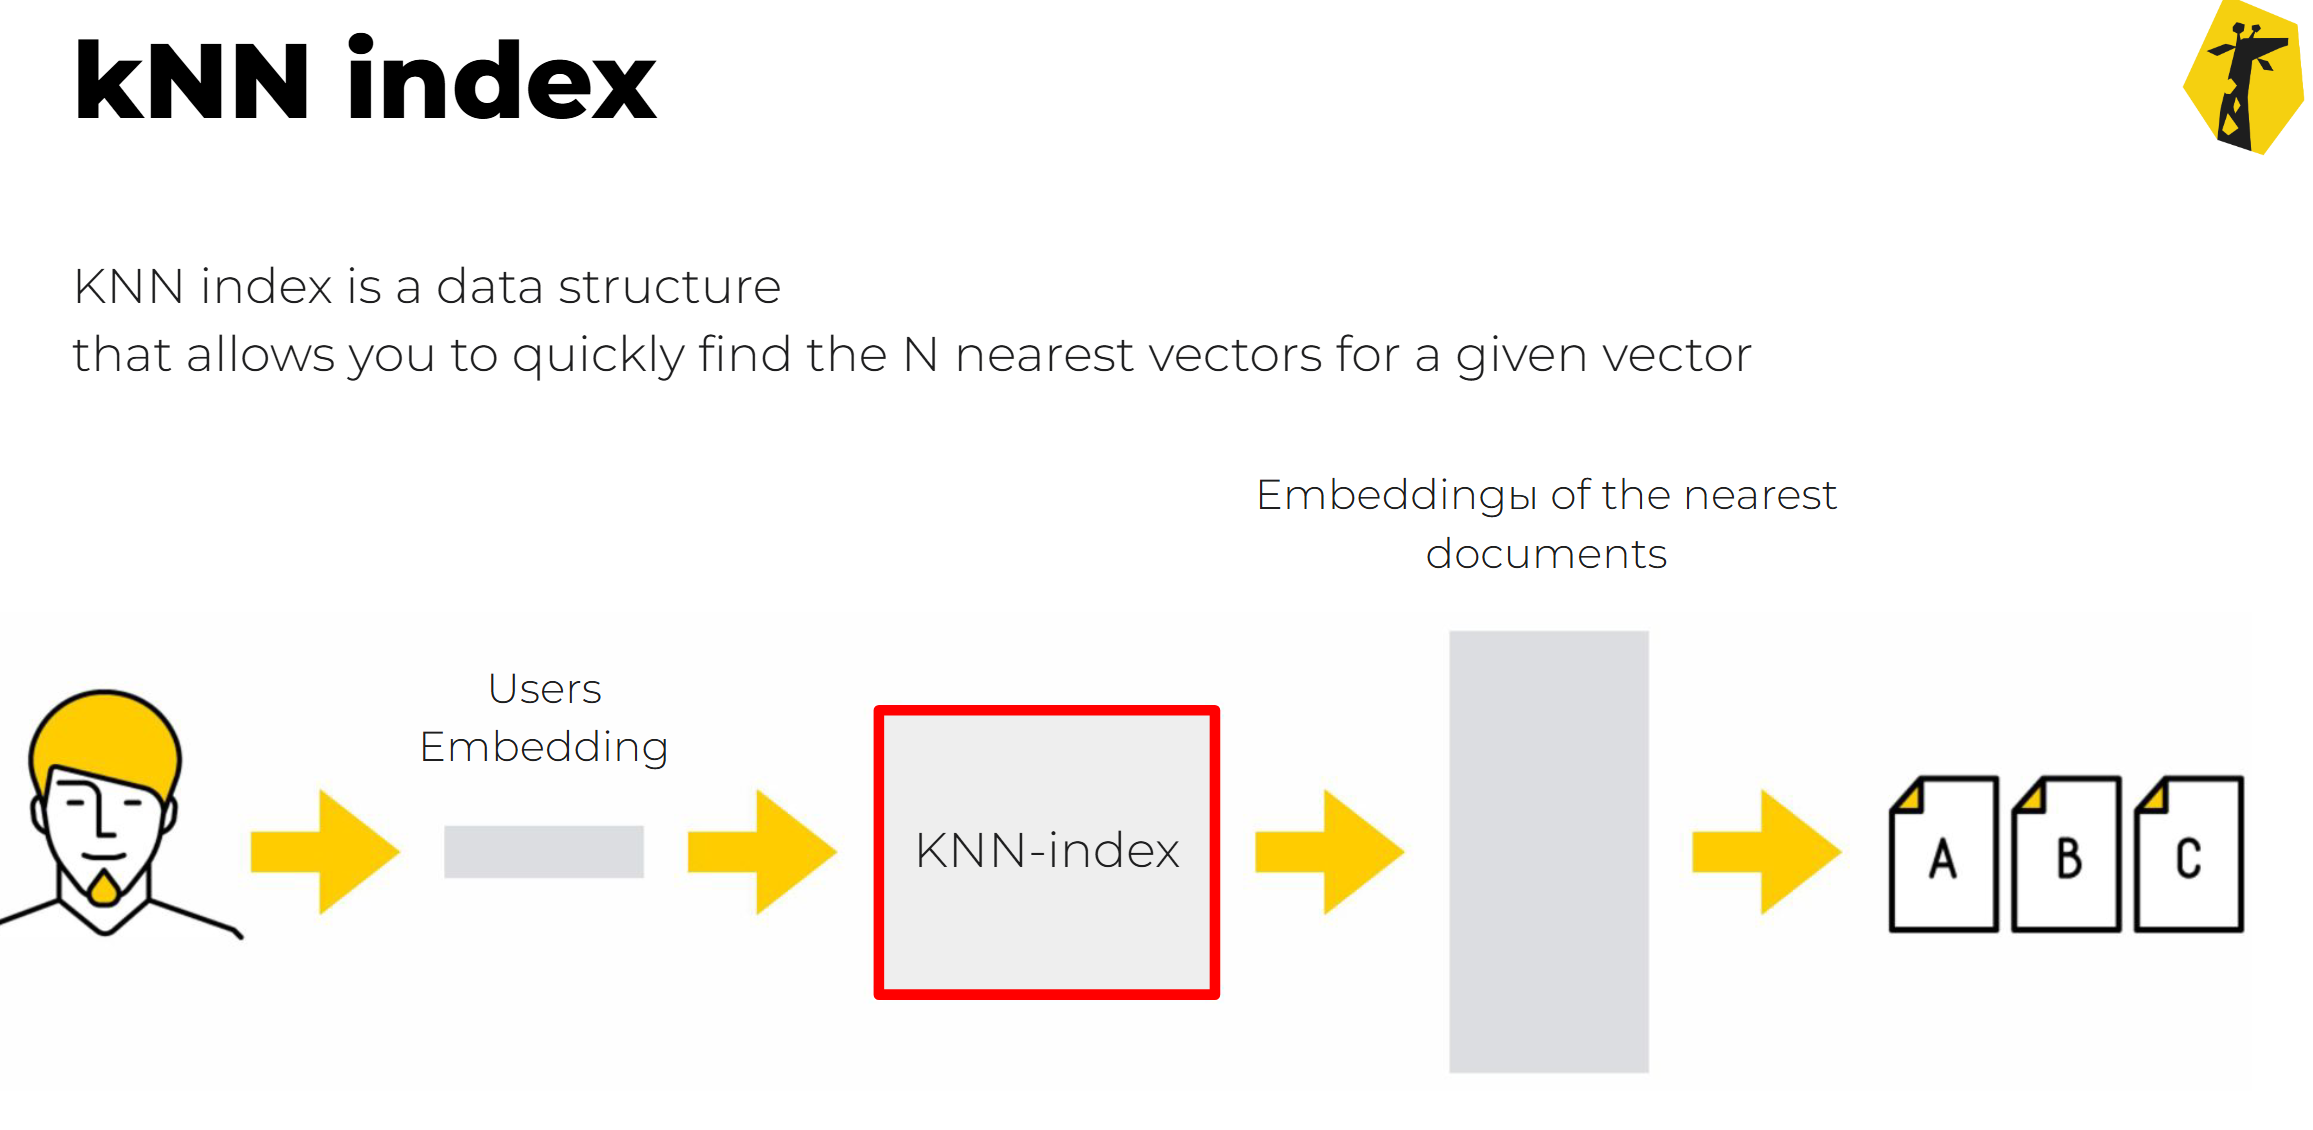

### Navigable small world (NSW)

Строит граф из пространства точек.

Почему "маленький мир": можно дойти до любой точки даже в огромном пространстве за небольшое число "рукопожатий" (переходов между точками).

Главная идея в том, чтобы держать набор коротких (локальных) связей и небольшое количество длинных (long-range). Граф разреженный (не более заранее выбранного количества $M$ связей на узел).

Построение графа:

1. Если граф пустой, добавляем первую точку
2. Для новой точки $v_i$:
    1. Стартуем в случайной имеющейся в графе точке
    2. Жадно обходим соседей. Т.е. держим $n$ (гиперпараметр) узлов в памяти, отсортированных по расстоянию до $v_i$ (сначала ближайшие). Если в очереди обхода появился $n+1$ узел, выкидываем с хвоста самый далёкий.
    3. Выбираем из очереди обхода, оставшейся с предыдущего шага, $M$ (гиперпараметр) узлов, цепляем новый узел к ним. (Можно с дополнительным ограничением: угол между $v_i$ и узлом-кандидатом должен быть больше порога-гиперпараметра. Также оставляем там немного отдалённых узлов.)
    4. Убеждаемся, что ни у какого узла не стало больше $M$ соседей. Иначе обрезаем (убираем самые дальние, или по углам как выше описано).

"Длинные связи" появляются сами по себе: если мы прыгнули удачно из случайной точки старта сразу поближе к добавляемому узлу, нашли там сразу нужное число соседей, то точка старта может всё ещё быть в очереди поиска к моменту, когда мы из этой очереди связи начнём делать.

### HNSW

Hierarchical NSW.

Слоённый navigable small world.

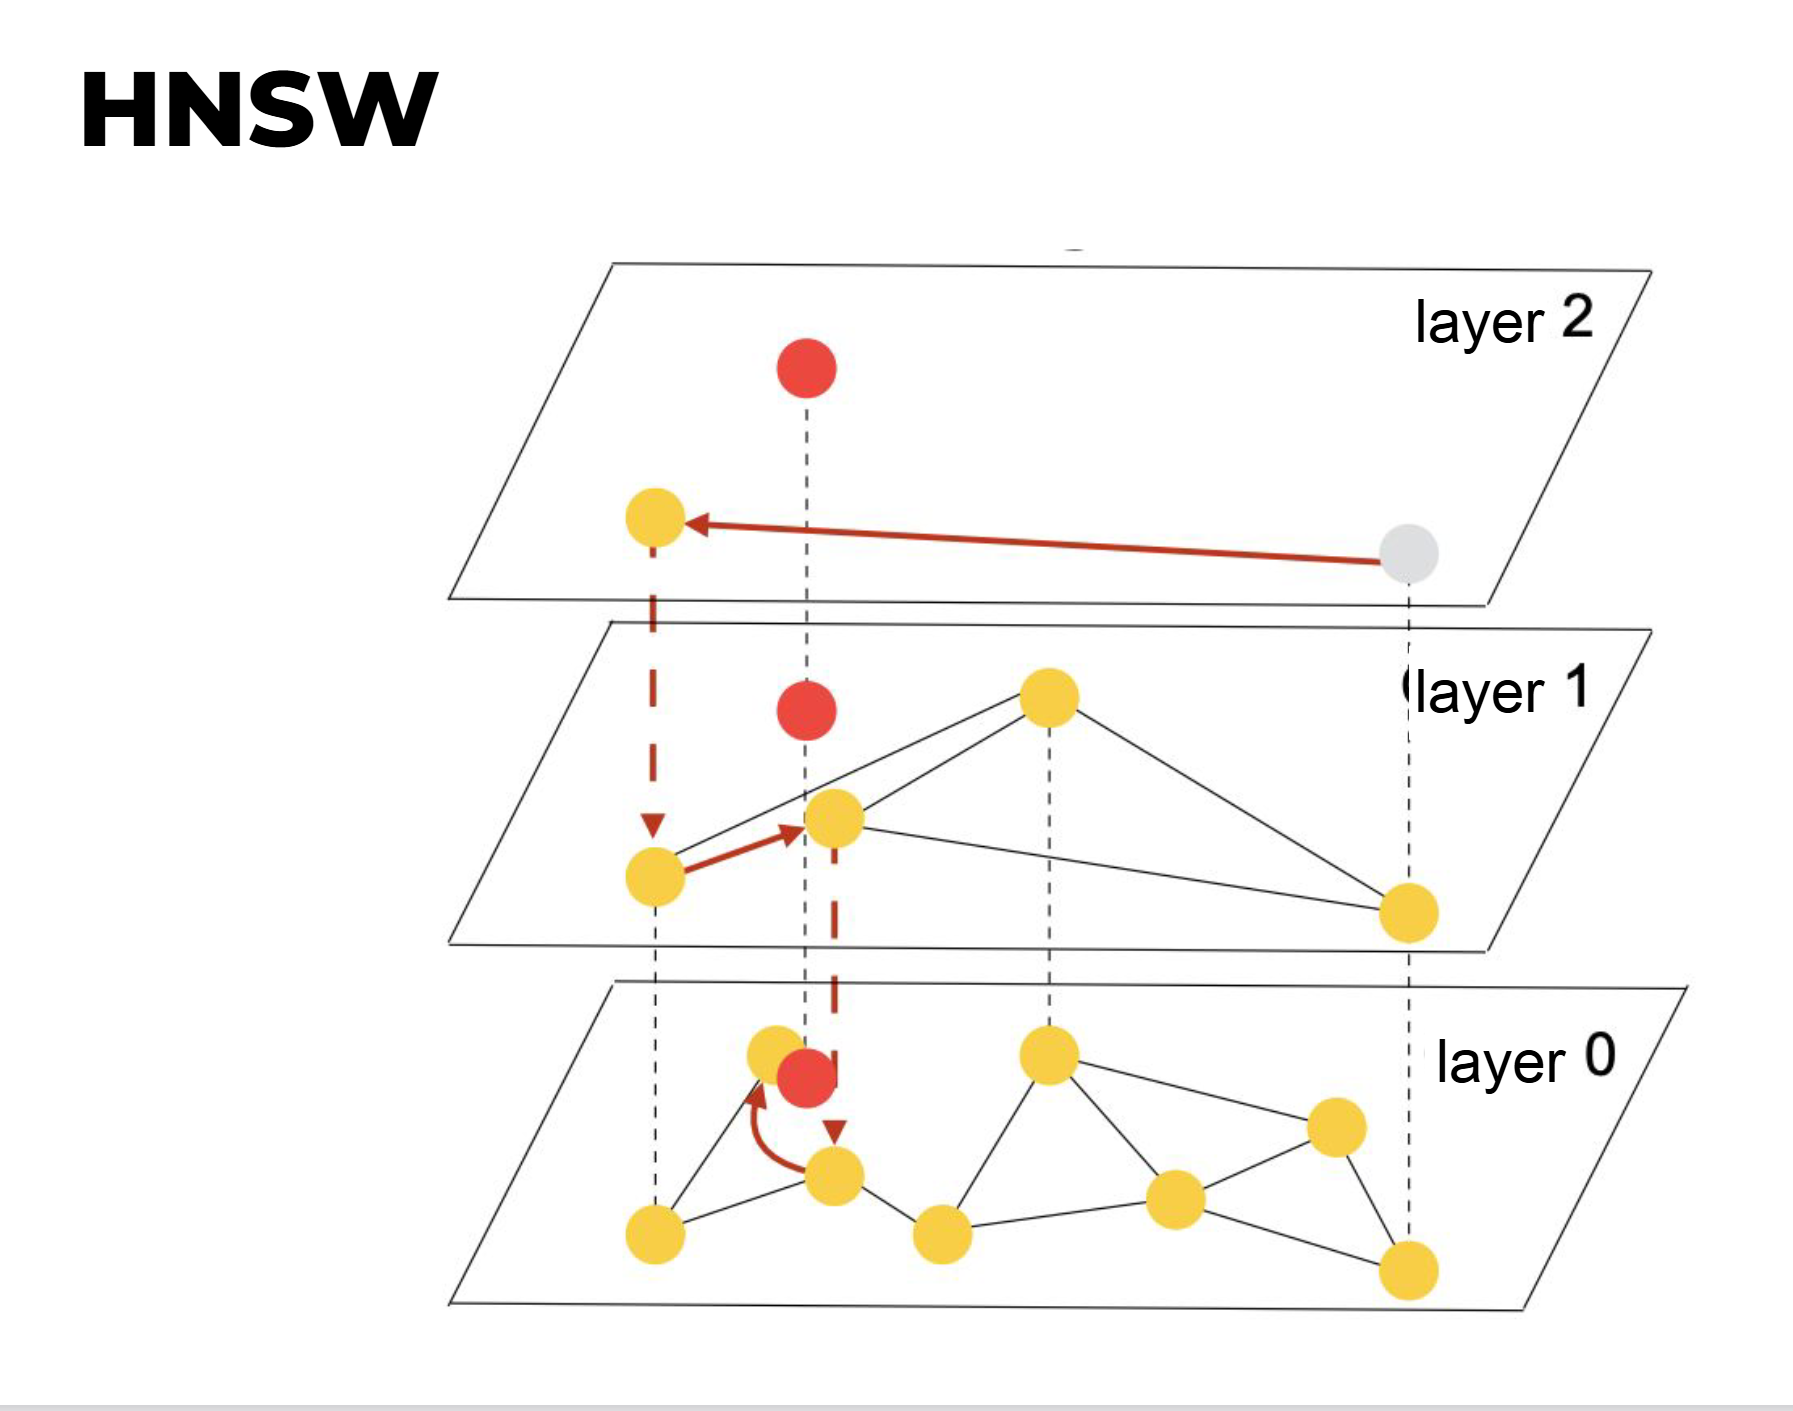

На самом нижнем слое все узлы. На верхних слоях случайное число узлов, всё меньшее. (Каждый узел с любого верхнего уровня всегда представлен также на всех уровнях что ниже.)

Поиск изображён на картинке выше: ищем сначала на самом верхнем уровне, потом спускаемся вниз.

Для нового узла:

1. Случайно выбрать уровень (больше шансов что попадётся нижний уровень)
2. Идти по уровням от назначенного и вниз, на каждом цепляя новый узел по правилам NSW.

## 20 Quantization

Квантизация (quantization) эмбеддингов в рекомендательных системах — это метод сжатия моделей, при котором вещественные (float32 или float16) векторы эмбеддингов заменяются на представление с меньшей битностью, например int8 или даже бинарное (1 бит). Это позволяет **существенно сократить объем памяти и ускорить вычисления**, особенно на стадии инференса, при работе с большими таблицами эмбеддингов.

### Зачем это нужно

* В современных рекомендательных системах эмбеддинговые таблицы могут содержать **миллионы пользователей и объектов**.
* Стандартные float32-вектора (например, 128-мерные) занимают сотни мегабайт или гигабайт.
* Квантизация позволяет **уместить модель в GPU память** или ускорить выполнение на CPU.

### Метод

Рассмотрим эмбеддинг-вектор $\mathbf{e} \in \mathbb{R}^d$, который мы хотим квантизовать до 8 бит:

1. **Линейная квантизация (Uniform Quantization)**
   Каждый компонент $e_i$ заменяется по формуле:

   $$
   q_i = \left\lfloor \frac{e_i - \min(\mathbf{e})}{\Delta} \right\rfloor, \quad \text{где } \Delta = \frac{\max(\mathbf{e}) - \min(\mathbf{e})}{2^b - 1}
   $$

   где $b$ — число битов (например, 8), $q_i \in \{0, ..., 2^b - 1\}$ — квантизованное значение.

2. **Декодирование при инференсе**:

   $$
   \hat{e}_i = q_i \cdot \Delta + \min(\mathbf{e})
   $$

3. **Vector-wise или row-wise quantization** — масштабируются и сдвигаются значения **всего эмбеддинга** (строки), что позволяет использовать общее $\min$ и $\max$ на строку.

4. **Product Quantization (PQ)** — эмбеддинг разбивается на блоки (подвекторы), каждый из которых квантизуется отдельно с использованием обученного кодбука (подобно KMeans). Это позволяет достичь лучшего качества при более сильном сжатии.

### Применение и trade-off

* **Обучение** может происходить в float32, а квантизация применяется **постфактум**.
* Иногда используется **quantization-aware training**, при котором модель учится устойчиво к шуму от квантизации.
* Качество рекомендаций может немного падать, но при правильной квантизации — **незначительно**.



## 21 Технология Item2Item (Item-to-Item)

Технология **Item2Item (предмет к предмету)** — это широко используемый подход в рекомендательных системах, особенно для фильтрации на основе объектов. Эта технология специально разработана для того, чтобы рекомендовать объекты, схожие с теми, с которыми пользователь уже взаимодействовал, купил или высоко оценил. Основная идея **Item2Item** заключается в вычислении сходства между объектами и использовании этой информации для генерации рекомендаций.

#### Ключевые компоненты технологии Item2Item:

1. **Вычисление сходства между объектами:**
   - **Косинусное сходство**: Измеряет косинус угла между двумя векторами в пространстве объектов. Объекты, которые находятся близко друг к другу с точки зрения взаимодействий пользователей (например, рейтингов или покупок), будут иметь высокое косинусное сходство.
     $
     \text{cosine\_sim}(i, j) = \frac{\sum_{u} R_{u,i} \cdot R_{u,j}}{\sqrt{\sum_{u} R_{u,i}^2} \cdot \sqrt{\sum_{u} R_{u,j}^2}}
     $
     где $R_{u,i}$ — рейтинг, который пользователь $u$ поставил объекту $i$, и $R_{u,j}$ — рейтинг, который пользователь $u$ поставил объекту $j$.
     
   - **Корреляция Пирсона**: Измеряет линейную корреляцию между рейтингами двух объектов по пользователям. Этот показатель полезен для нахождения связей между объектами, которые не очевидны в данных.
     $
     \text{pearson\_sim}(i, j) = \frac{\sum_{u} (R_{u,i} - \bar{R_i})(R_{u,j} - \bar{R_j})}{\sqrt{\sum_{u} (R_{u,i} - \bar{R_i})^2} \cdot \sqrt{\sum_{u} (R_{u,j} - \bar{R_j})^2}}
     $
     где $\bar{R_i}$ и $\bar{R_j}$ — средние значения рейтингов для объектов $i$ и $j$ соответственно.

   - **Сходство Жаккара**: Измеряет сходство между двумя множествами пользовательских взаимодействий. Оно часто используется при работе с бинарными данными, например, когда нужно узнать, взаимодействовал ли пользователь с объектом (кликнул, понравился и т.д.).
     $
     \text{jaccard\_sim}(i, j) = \frac{|I_i \cap I_j|}{|I_i \cup I_j|}
     $
     где $I_i$ и $I_j$ — множества пользователей, которые взаимодействовали с объектами $i$ и $j$, соответственно.

2. **Построение матрицы сходства объектов:**
   - Первый шаг — вычисление попарных сходств между объектами. Это формирует матрицу сходства $ S $, где каждый элемент $ S(i, j) $ представляет сходство между объектами $i$ и $j$. Эта матрица может быть как плотной, так и разреженной, в зависимости от дизайна системы и количества взаимодействий между объектами и пользователями.

3. **Генерация рекомендаций:**
   - **Топ-N рекомендации**: После того как матрица сходства построена, система генерирует рекомендации, рассматривая наиболее похожие объекты на те, с которыми пользователь уже взаимодействовал. Объекты с наибольшими значениями сходства затем сортируются и рекомендуются.
   - **Взвешенная сумма сходств**: Для каждого объекта, с которым пользователь взаимодействовал (например, поставил рейтинг или купил), система предсказывает новые объекты, вычисляя взвешенную сумму похожих объектов:
     $
     \hat{R}_{u,j} = \sum_{i \in \mathcal{I}_u} S(i,j) \cdot R_{u,i}
     $
     где $ \hat{R}_{u,j} $ — предсказанный рейтинг для пользователя $u$ на объект $j$, а $\mathcal{I}_u$ — множество объектов, с которыми пользователь $u$ уже взаимодействовал.

4. **Оптимизация и масштабируемость:**
   - **Факторизация матрицы**: Для больших наборов данных матрица сходства объектов может быть вычислительно дорогой. Одним из решений является применение методов факторизации матриц (например, сингулярного разложения), чтобы уменьшить размерность данных и оптимизировать процесс рекомендаций.
   - **Эффективная индексация**: Для повышения скорости извлечения похожих объектов можно использовать алгоритмы, такие как **k-d деревья** или **Ball Trees** для эффективного поиска ближайших соседей.
   - **Приближенные ближайшие соседи (ANN)**: В системах, работающих с большими объемами данных, методы, такие как **Locality Sensitive Hashing (LSH)** или **Annoy**, помогают быстро находить приближенные ближайшие соседи для рекомендаций объектов.

5. **Реальные приложения:**
   - **Amazon**: Рекомендации на основе Item2Item используются в платформах электронной коммерции, таких как Amazon, для предложений продуктов, схожих с теми, которые пользователь просмотрел или купил.
   - **Netflix**: Этот подход применяется для рекомендации фильмов и телешоу на основе сходства между объектами.
   - **Spotify**: Музыкальные платформы часто используют рекомендации типа "предмет к предмету" для предложения схожих треков или альбомов на основе предпочтений пользователя.

#### Преимущества технологии Item2Item:
- **Персонализация**: Предоставляет персонализированные рекомендации на основе поведения пользователя и его взаимодействий.
- **Масштабируемость**: Методы Item2Item хорошо масштабируются на большие наборы данных, особенно когда они комбинируются с эффективными методами индексации.
- **Интерпретируемость**: Рекомендации, основанные на объектах, более интерпретируемы, чем некоторые модели "черного ящика", так как они основаны на метриках сходства, которые легко объяснить.

#### Ограничения:
- **Проблема холодного старта**: Новые объекты, не имеющие предварительных взаимодействий с пользователями, могут быть рекомендованы неэффективно.
- **Смещение по популярности**: Популярные объекты могут доминировать в рекомендациях, что может затмить нишевые объекты.
- **Разреженность**: В системах с большим количеством объектов и относительно меньшим количеством взаимодействий (разреженная матрица) матрицы сходства могут быть разреженными и, соответственно, менее точными.

В заключение, технология **Item2Item** использует идею, что объекты, с которыми пользователи взаимодействовали схожим образом, скорее всего, будут интересны тем же пользователям. Этот метод работает путем вычисления сходства между объектами и генерации рекомендаций на основе этих сходств, и он оказался эффективным для множества платформ, использующих рекомендации.
